<a href="https://colab.research.google.com/github/Geckomonc/AI20242-GeraldineAcevedo-MairaRodas/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Kaggle

In [56]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

#Descargando la data de Kaggle

In [57]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


#Unzip and inspect data

In [58]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y


In [59]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


#Cargar datos de entrenamiento con panda

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train.csv")
print ("shape of loaded dataframe", data.shape)


shape of loaded dataframe (692500, 12)


In [61]:
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


#Exploración de los datos

Vamos a visualizar todas las columnas como gráficas con el fin de comprender mejor los datos y ver la cantidad de estudiantes por valor.

<Axes: xlabel='PERIODO'>

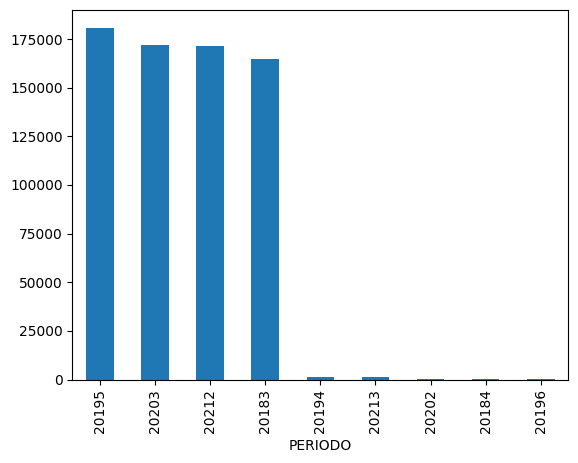

In [62]:
data.PERIODO.value_counts().plot(kind='bar')

Nos hemos dado cuenta que se debe realizar una nueva organización de valores de la columna de programas académicos porque se tienen mucho valores únicos.

In [63]:
pd.set_option('display.max_rows', None)

# Contar la cantidad de ocurrencias de cada valor único en la columna "ESTU_PRGM_ACADEMICO"
conteo_programas = data["ESTU_PRGM_ACADEMICO"].value_counts()

# Mostrar el resultado
print(conteo_programas)

pd.reset_option('display.max_rows')

ESTU_PRGM_ACADEMICO
DERECHO                                                                                                          53244
ADMINISTRACION DE EMPRESAS                                                                                       51902
CONTADURIA PUBLICA                                                                                               39664
PSICOLOGIA                                                                                                       31932
INGENIERIA INDUSTRIAL                                                                                            28481
ADMINISTRACIÓN DE EMPRESAS                                                                                       24777
INGENIERIA CIVIL                                                                                                 19487
MEDICINA                                                                                                         18099
PSICOLOGÍA                  

<Axes: xlabel='ESTU_PRGM_ACADEMICO'>

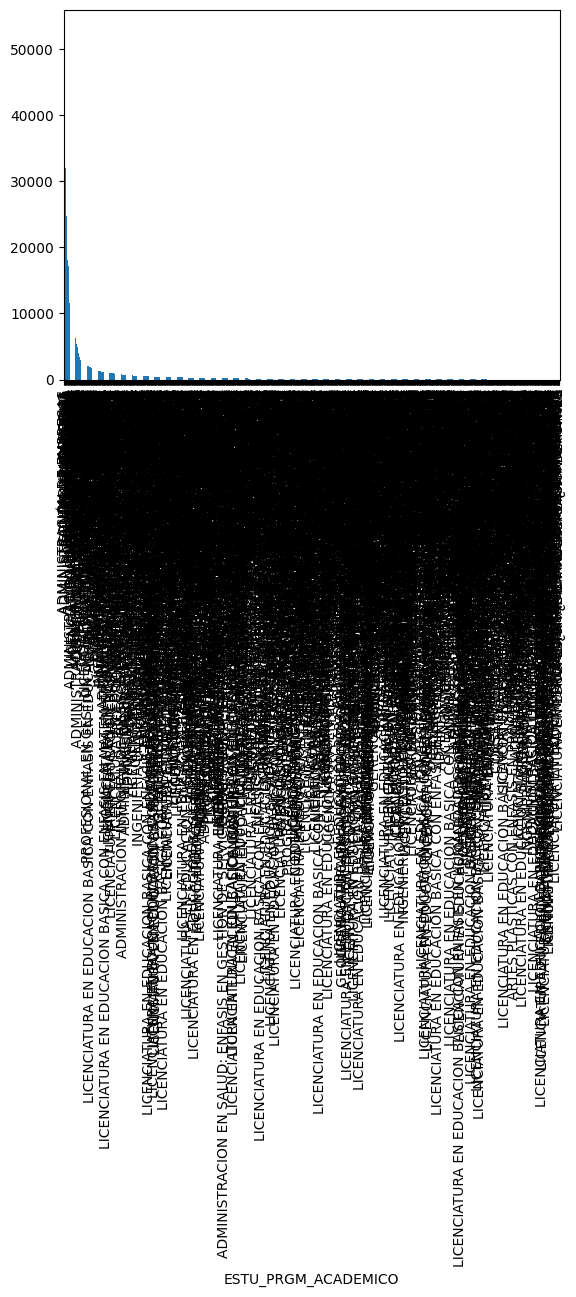

In [64]:
data.ESTU_PRGM_ACADEMICO.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

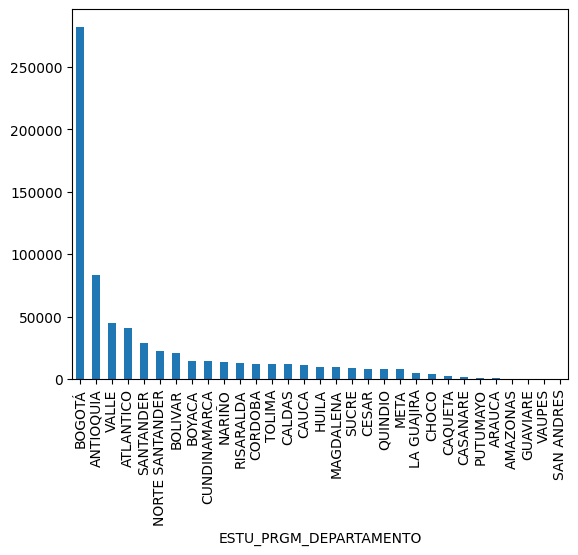

In [65]:
data.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

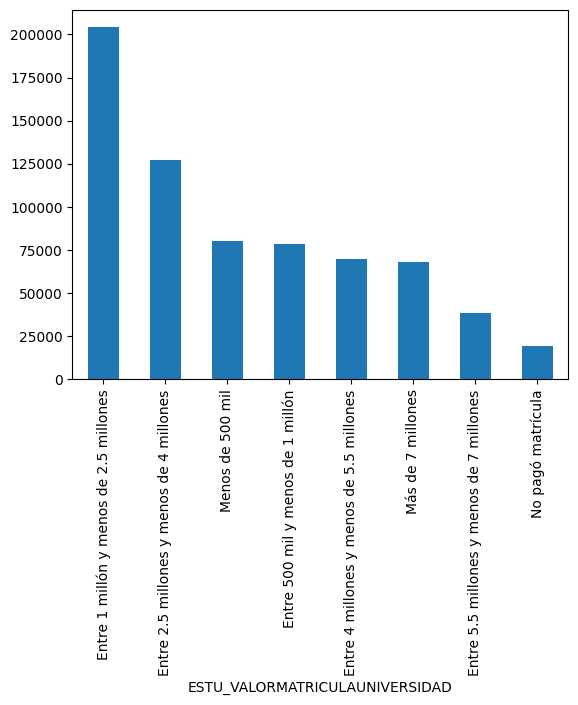

In [66]:
data.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

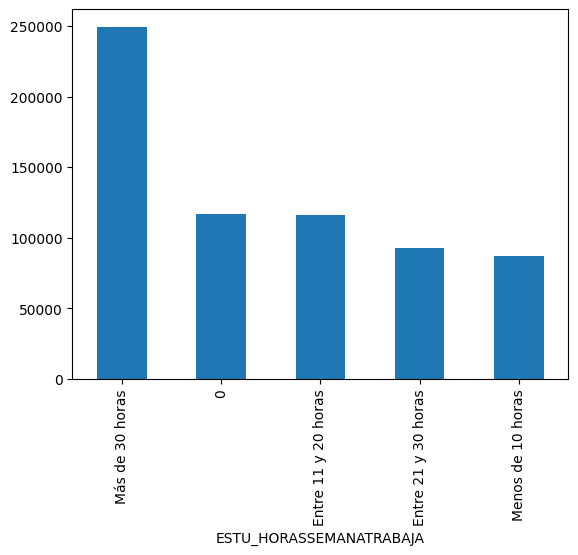

In [67]:
data.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

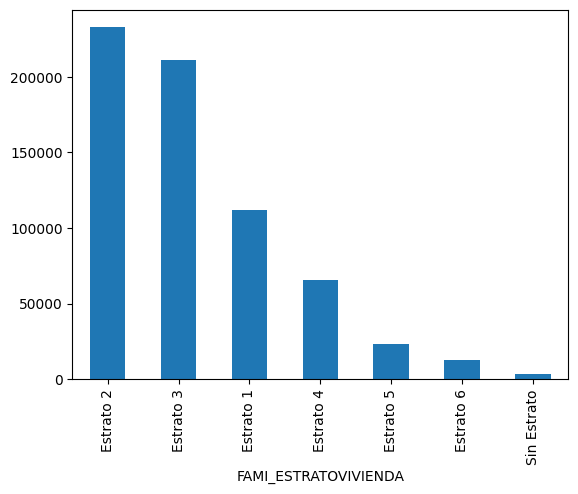

In [68]:
data.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_TIENEINTERNET'>

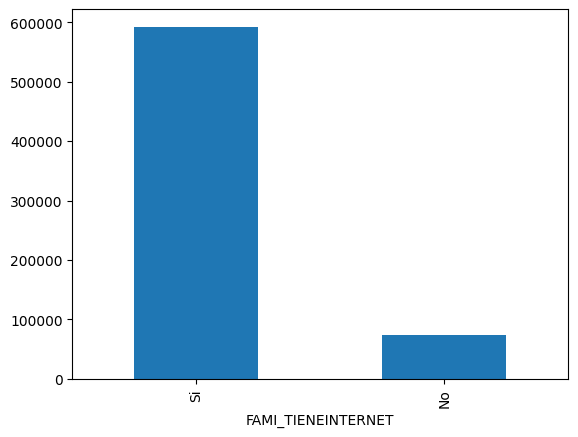

In [69]:
data.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONPADRE'>

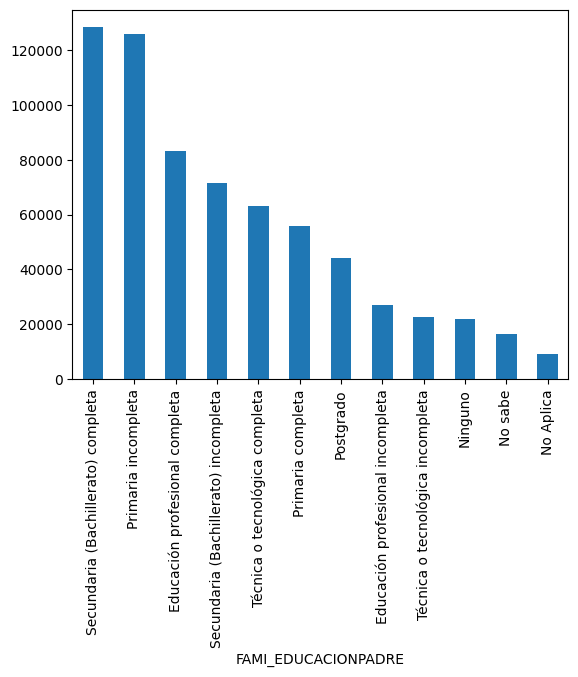

In [70]:
data.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONMADRE'>

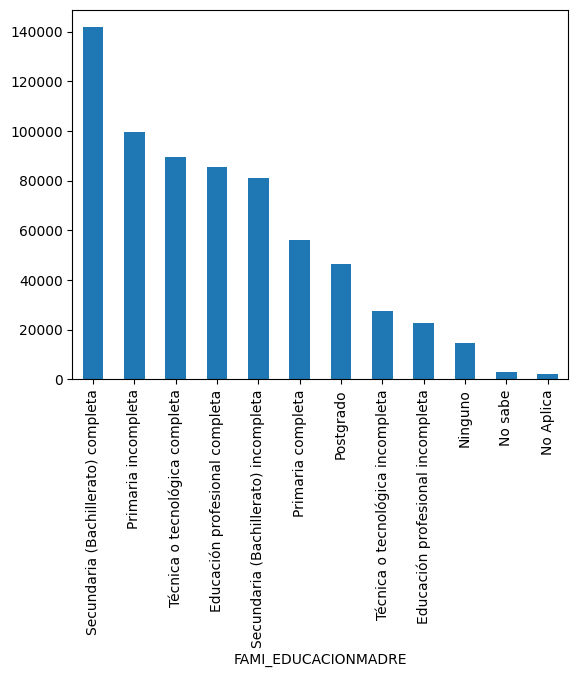

In [71]:
data.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_PAGOMATRICULAPROPIO'>

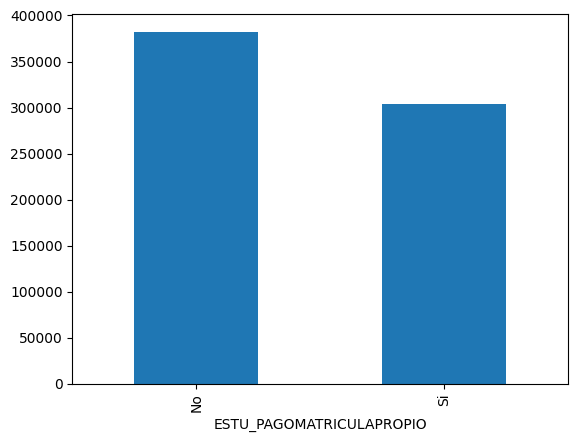

In [72]:
data.ESTU_PAGOMATRICULAPROPIO.value_counts().plot(kind='bar')

#Visualización de las influencias

Ahora queremos ver como se relaciona el rendimiento global de los estudiantes con los valores únicos de cada columna, e intentar visualizar a primera vista si existe algún tipo de influencia sobre el rendimiento global.

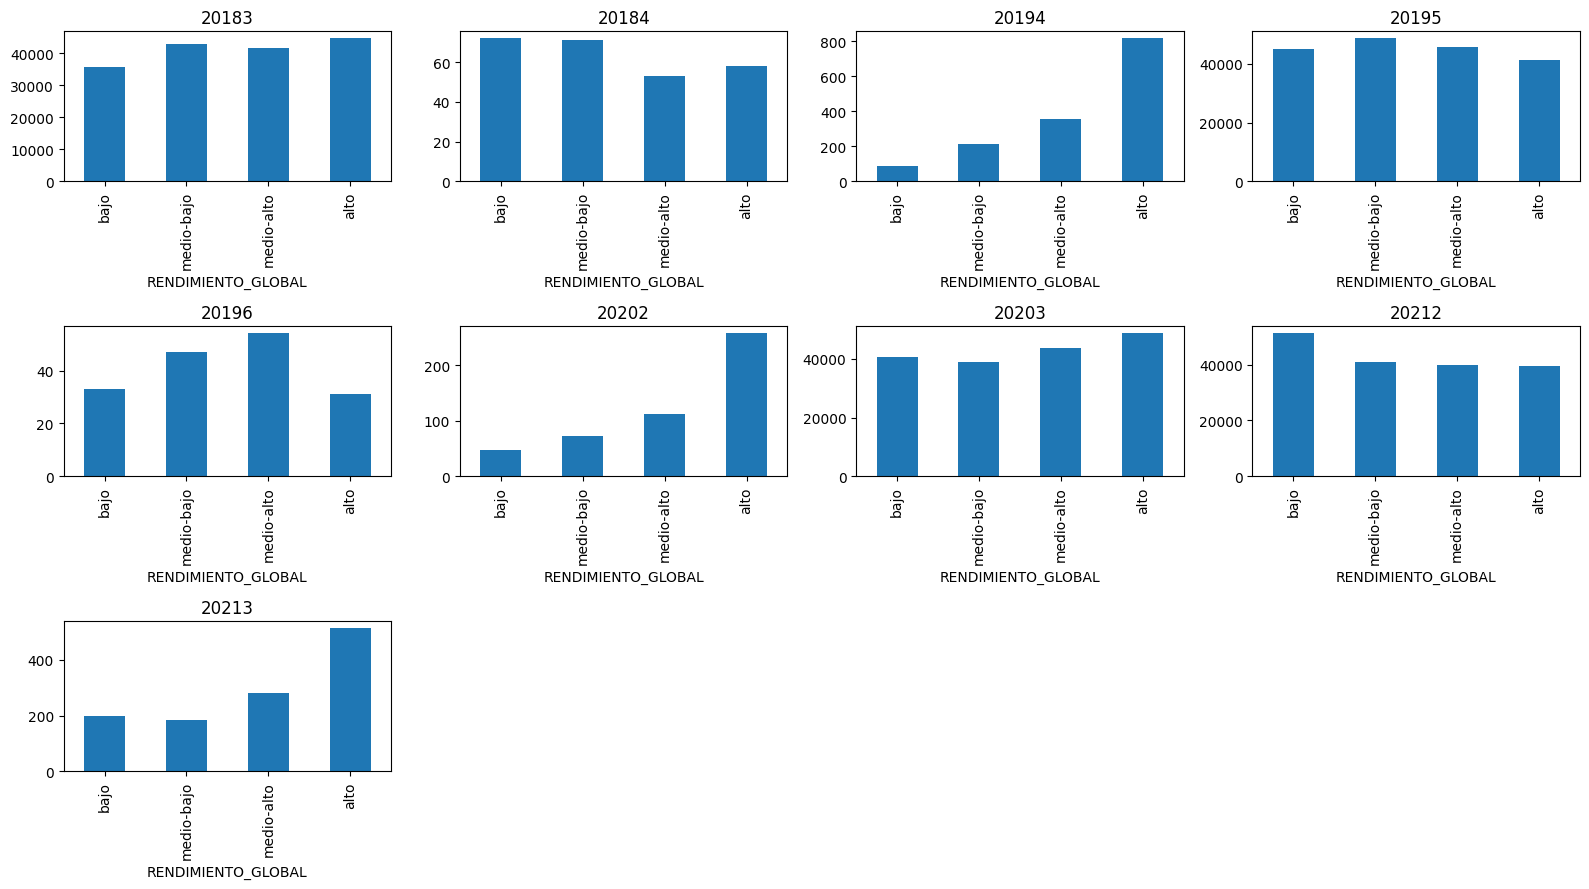

In [73]:
from rlxutils import subplots
import matplotlib.pyplot as plt

column = data.PERIODO

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

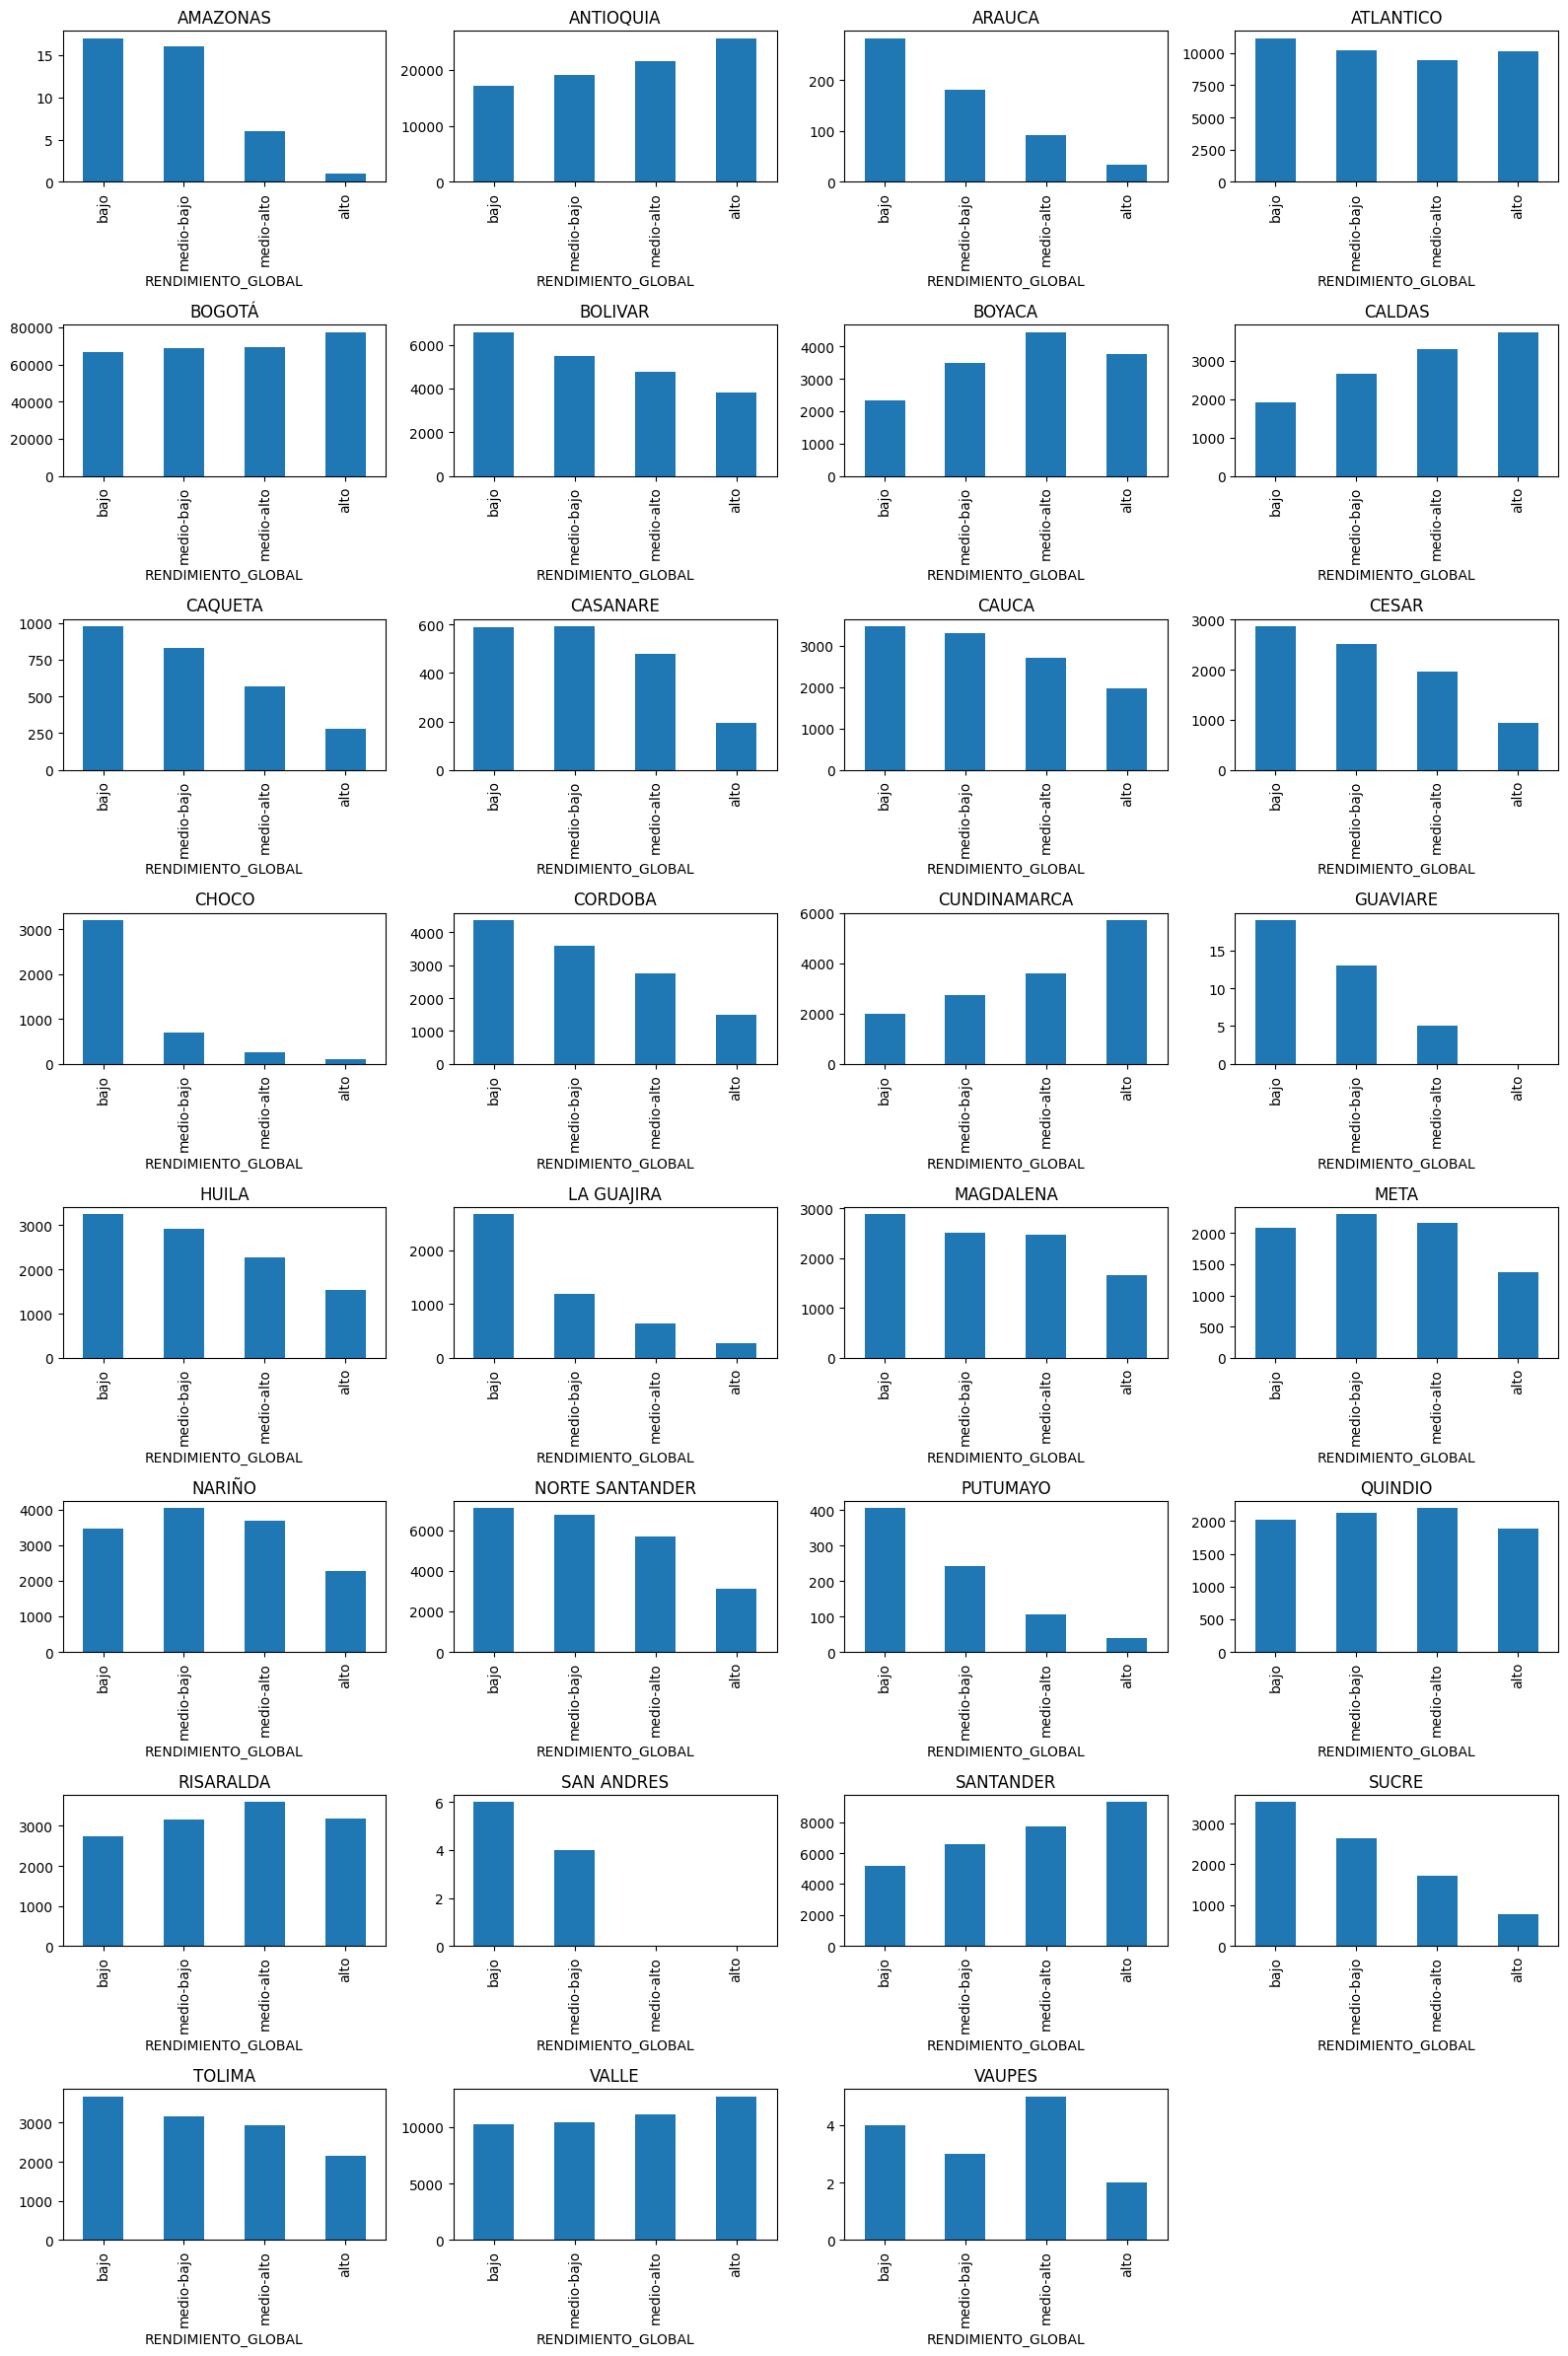

In [74]:
column = data.ESTU_PRGM_DEPARTAMENTO

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts().reindex(['bajo', 'medio-bajo', 'medio-alto', 'alto'], fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(ci)
plt.tight_layout()
plt.show()

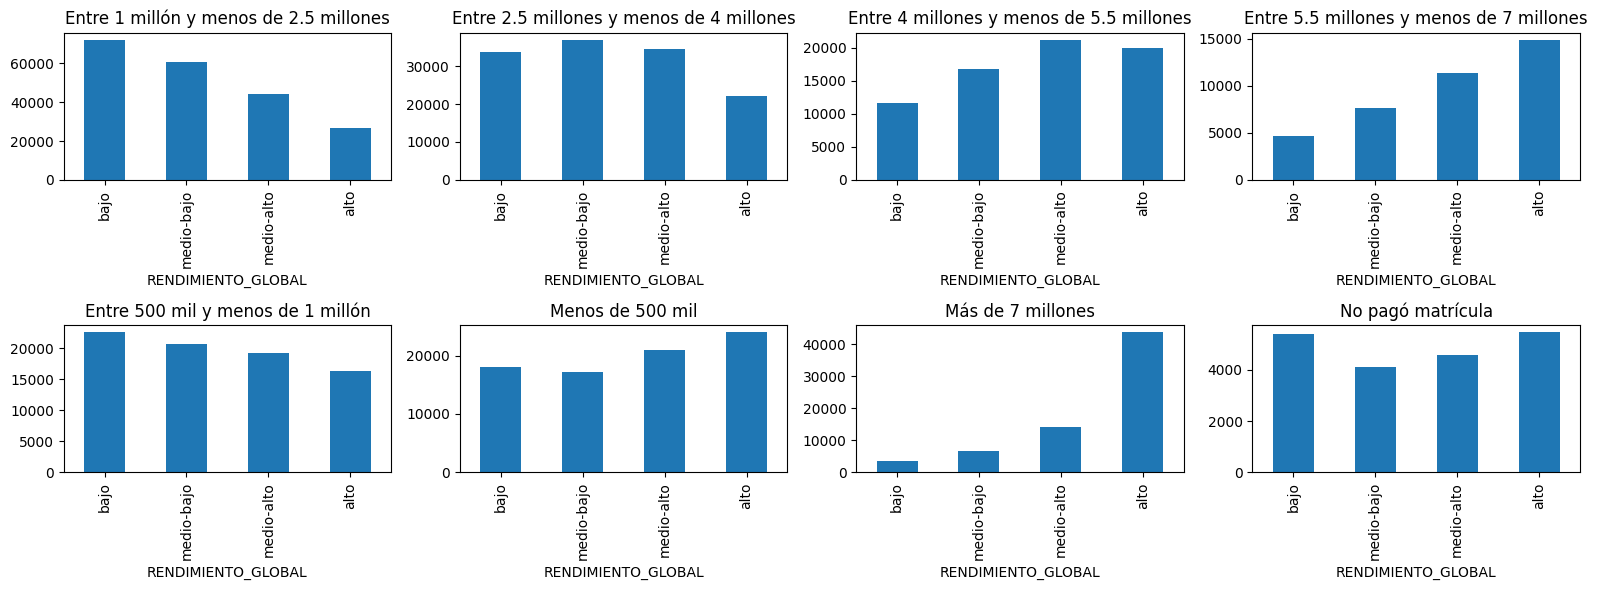

In [75]:
column = data.ESTU_VALORMATRICULAUNIVERSIDAD

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

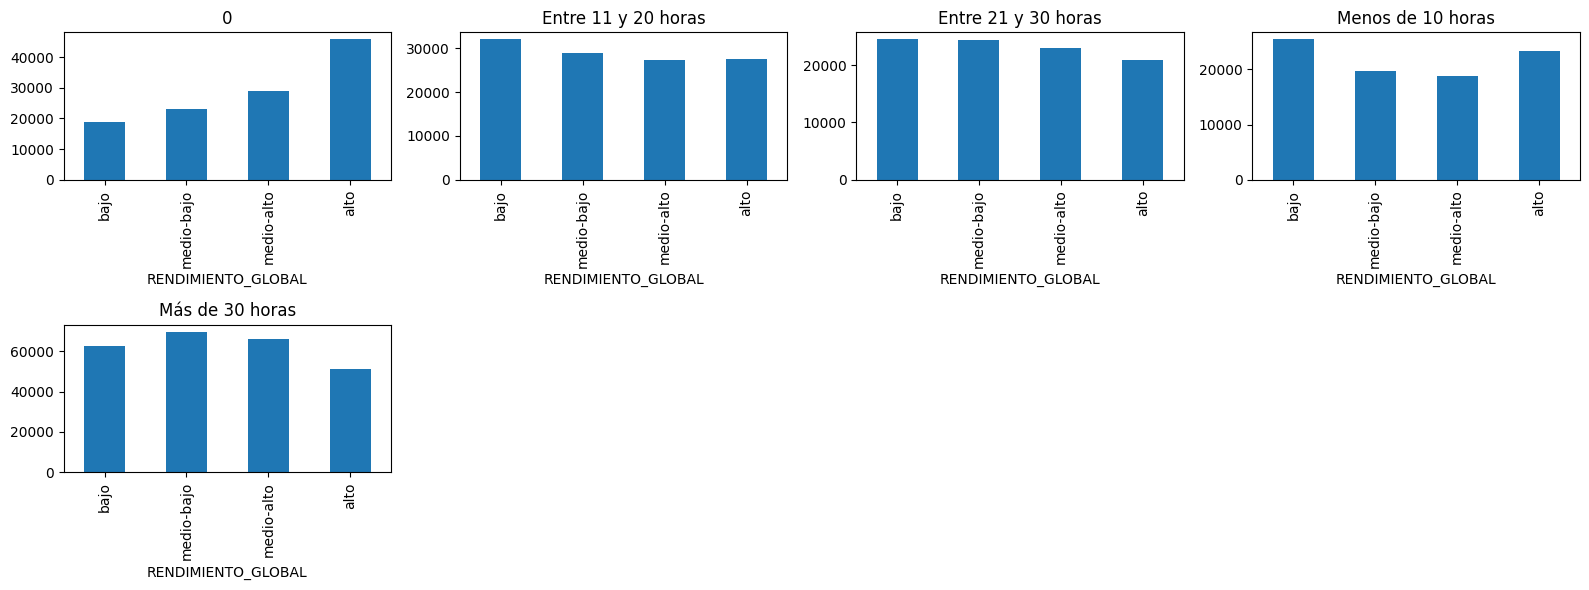

In [76]:
column = data.ESTU_HORASSEMANATRABAJA

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

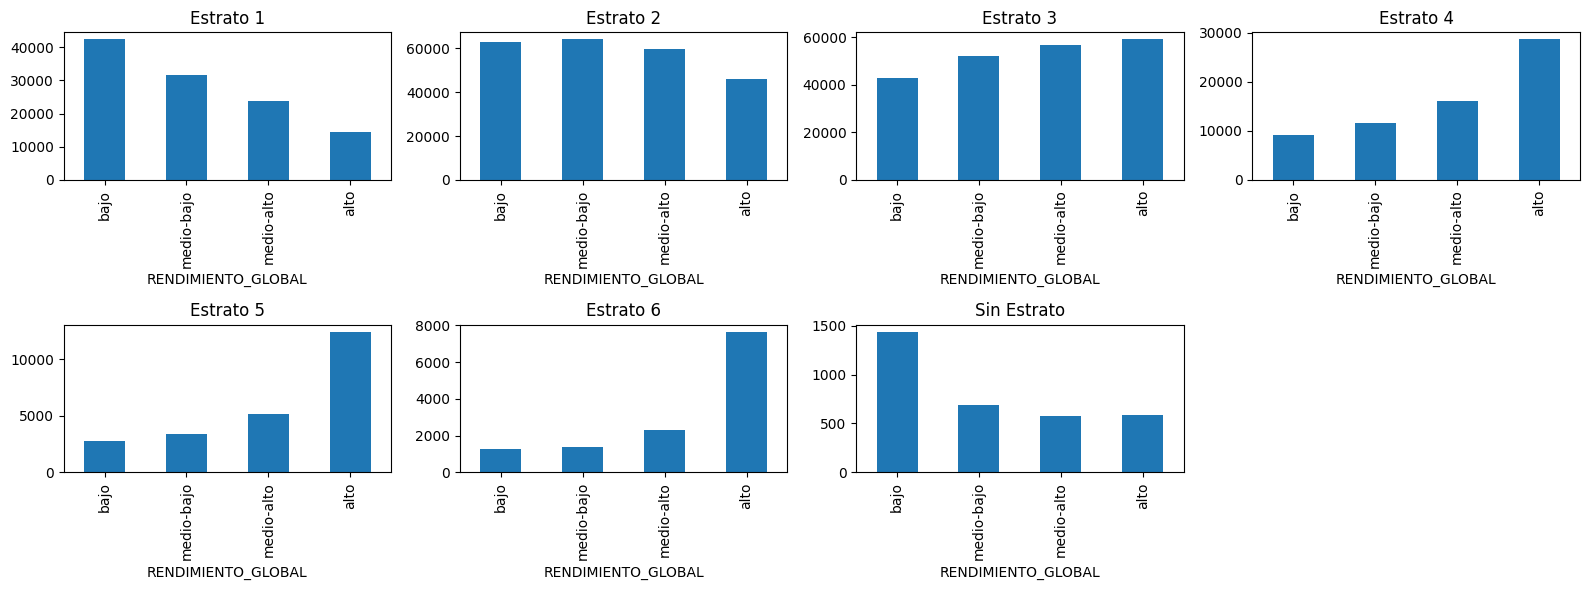

In [77]:
column = data.FAMI_ESTRATOVIVIENDA

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

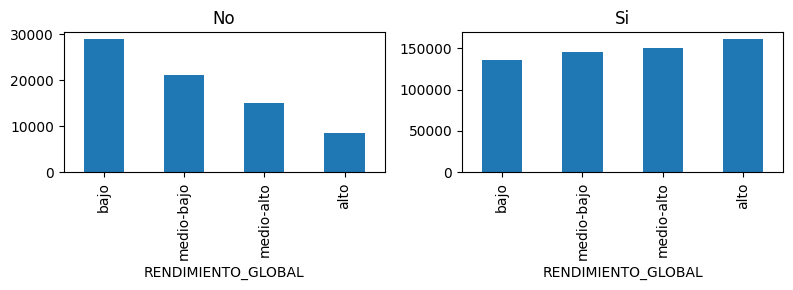

In [78]:
column = data.FAMI_TIENEINTERNET

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

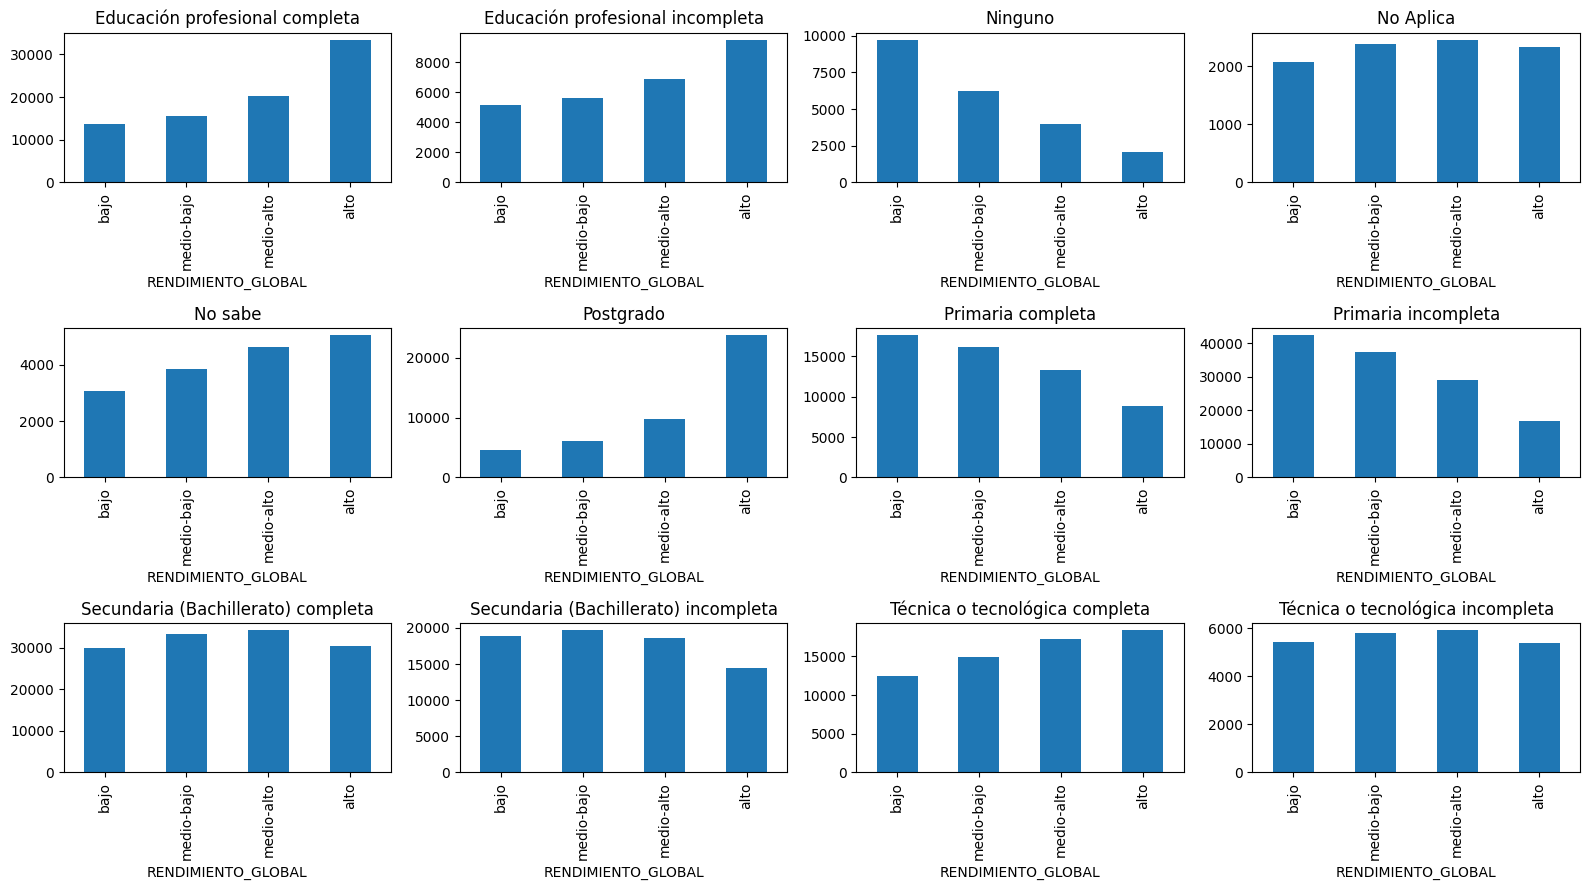

In [79]:
column = data.FAMI_EDUCACIONPADRE

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

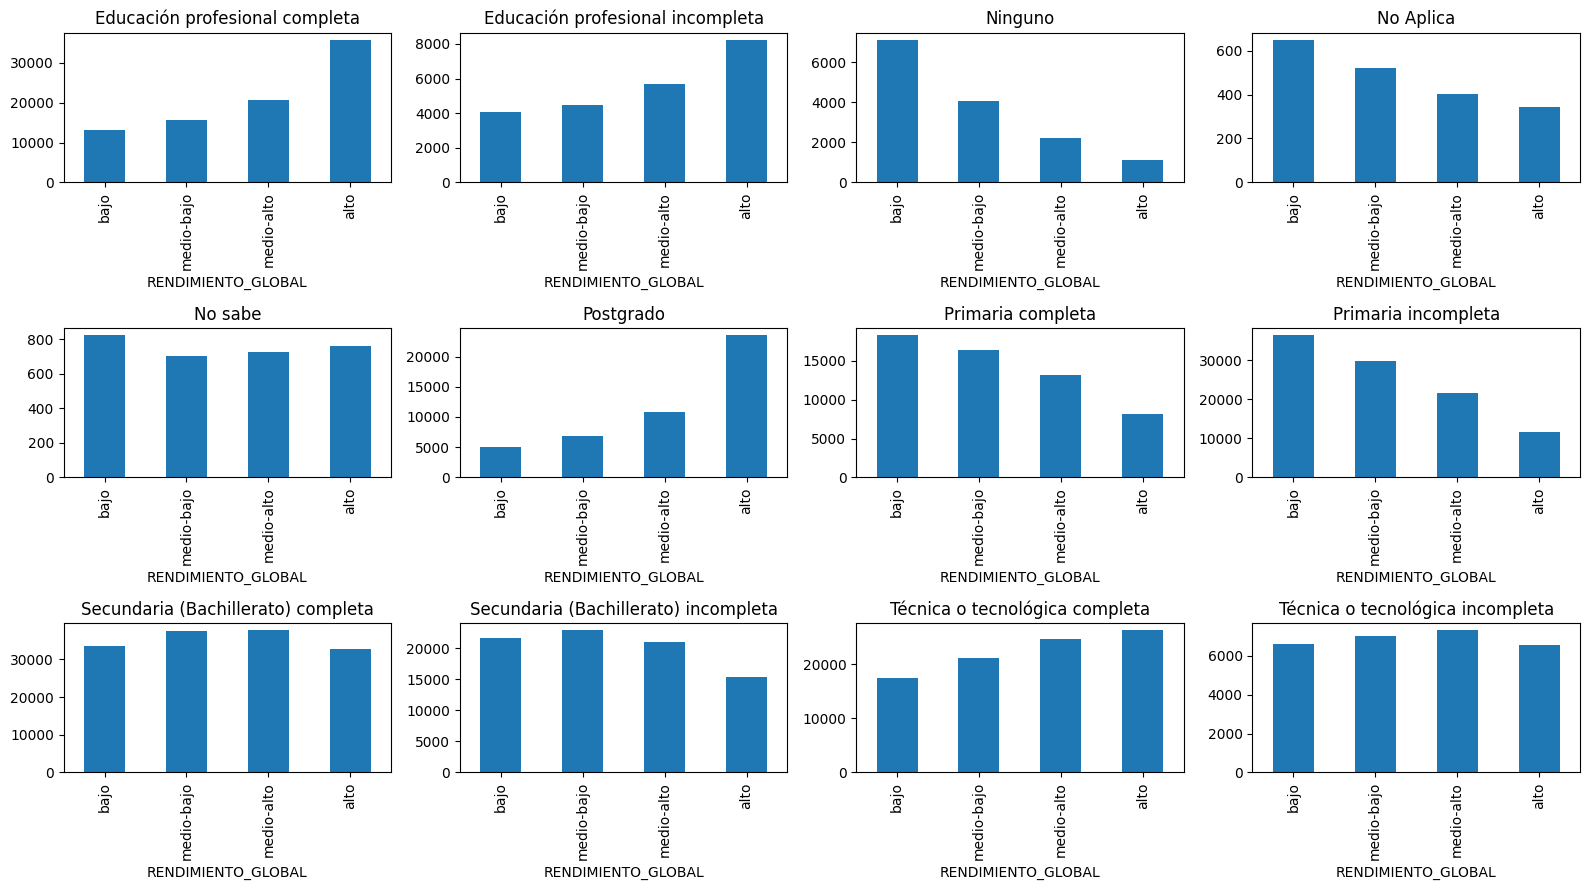

In [80]:
column = data.FAMI_EDUCACIONMADRE

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

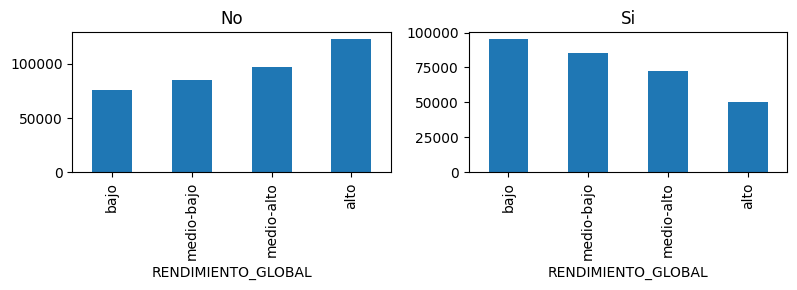

In [81]:
column = data.ESTU_PAGOMATRICULAPROPIO

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

# Agrupación datos Programa Academico

En primer lugar queremos manejar los valores unicos de la columna "ESTU_PRGM_ACADEMICO" en grupos, con el fin de no tener tantos valores unicos y poder visualizar los datos con mayor facilidad. Se proponen los grupos: ciencias sociales, ciencias economicas, pedagogia, ciencias exactas y naturales, educación física, idiomas y letras, administración, medicina, arte, comunicaciones, ingenieria, arquitectura, diseño, ciencias militares.

In [82]:
dataClean = data.copy()
grupo_dict = {
    'CIENCIAS_SOCIALES': [
        'DERECHO','LICENCIATURA EN CIENCIAS SOCIALES', 'LICENCIATURA EN ETNOEDUCACION','CIENCIAS POLITICAS',
        'LICENCIATURA EN FILOSOFIA', 'LICENCIATURA EN CIENCIAS RELIGIOSAS','CIENCIA POLITICA',
        'TRABAJO SOCIAL', 'LICENCIATURA EN FILOSOFÍA', 'RELACIONES INTERNACIONALES', 'JURISPRUDENCIA',
        'SOCIOLOGIA', 'FILOSOFIA', 'LICENCIATURA EN FILOSOFIA Y EDUCACION RELIGIOSA', 'LICENCIATURA EN TEOLOGIA',
        'PLANEACION Y DESARROLLO SOCIAL', 'PROFESIONAL EN CRIMINALISTICA',
        'LICENCIATURA EN ETNOEDUCACION CON ENFASIS EN CIENCIAS SOCIALES', 'CIENCIA POLÍTICA Y GOBIERNO',
        'ANTROPOLOGIA', 'CIENCIAS BIBLICAS', 'HISTORIA',  'PROFESIONAL EN TRABAJO SOCIAL', 'CIENCIA POLÍTICA',
        'TEOLOGIA', 'CIENCIA POLITICA Y GOBIERNO', 'CIENCIA POLITICA Y RELACIONES INTERNACIONALES',
        'RELACIONES INTERNACIONALES Y ESTUDIOS POLITICOS',  'GOBIERNO Y RELACIONES INTERNACIONALES',
        'GESTION CULTURAL Y COMUNICATIVA', 'LICENCIATURA EN ETNOEDUCACION Y DESARROLLO COMUNITARIO',
        'DERECHO Y CIENCIAS POLITICAS', 'CRIMINALISTICA', 'LICENCIATURA EN CIENCIAS RELIGIOSAS',
        'CIENCIAS POLÍTICAS', 'TEOLOGÍA', 'FILOSOFIA Y LETRAS', 'FILOSOFÍA', 'HISTORIA Y PATRIMONIO',
        'GERENCIA DE LA SEGURIDAD Y ANALISIS SOCIO POLITICO', 'LICENCIATURA EN FILOSOFIA',
        'INVESTIGACIÓN CRIMINAL', 'LICENCIATURA EN TEOLOGÍA',
        'DESARROLLO FAMILIAR','LICENCIATURA EN HISTORIA','SOCIOLOGÍA','POLITICA Y RELACIONES INTERNACIONALES',
        'DERECHO Y CIENCIAS SOCIALES', 'GOBIERNO Y ASUNTOS PUBLICOS','ESTUDIOS EN FILOSOFIA',
        'LICENCIATURA EN CIENCIAS SOCIALES Y DESARROLLO LOCAL',
        'PERIODISMO Y OPINION PUBLICA','FILOSOFÍA Y HUMANIDADES','DESARROLLO TERRITORIAL',
        'GEOGRAFIA DEL DESARROLLO REGIONAL Y AMBIENTAL','DERECHO Y CIENCIAS POLÍTICAS',
        'ACUICULTURA','LICENCIATURA EN EDUCACION COMUNITARIA CON ENFASIS EN DERECHOS HUMANOS',
        'CIENCIA POLITICA, GOBIERNO Y RELACIONES INTERNACIONALES','ESTUDIOS Y GESTIÓN CULTURAL',
        'FILOSOFIA Y HUMANIDADES', 'TERAPIAS PSICOSOCIALES', 'ANTROPOLOGÍA',
        'PROFESIONAL EN FILOSOFIA', 'LENGUAJES Y ESTUDIOS SOCIOCULTURALES', 'URBANISMO',
        'ESTUDIOS Y GESTION CULTURAL','ESTUDIOS POLITICOS Y RESOLUCION DE CONFLICTOS',
        'LICENCIATURA EN EDUCACION BASICA ENFASIS EN CIENCIAS SOCIALES',
        'GESTIÓN CULTURAL','GESTIÓN  DE SISTEMAS DE INFORMACIÓN','INVESTIGACION CRIMINAL',
        'PROFESIONAL EN INVESTIGACIÓN CRIMINAL', 'ARQUEOLOGIA',
        ],

    'CIENCIAS_ECONOMICAS': [
        'ECONOMIA', 'MERCADEO Y PUBLICIDAD', 'CONTADURIA PÚBLICA', 'CONTADURÍA PÚBLICA', 'MARKETING Y LOGISTICA',
        'CONTADURIA PUBLICA', 'NEGOCIOS INTERNACIONALES', 'FINANZAS Y COMERCIO INTERNACIONAL',
        'PROFESIONAL EN FINANZAS Y NEGOCIOS INTERNACIONALES', 'FINANZAS Y NEGOCIOS INTERNACIONALES',
        'ECONOMÍA','MERCADEO Y NEGOCIOS INTERNACIONALES', 'ECONOMIA Y FINANZAS INTERNACIONALES',
        'MERCADEO', 'ECONOMIA Y NEGOCIOS INTERNACIONALES', 'NEGOCIOS Y RELACIONES INTERNACIONALES',
        'NEGOCIOS INTERNACIONALES SEGUNDO CICLO',  'PROFESIONAL EN CONTADURIA PUBLICA', 'PROFESIONAL EN AGRONEGOCIOS',
        'RELACIONES ECONOMICAS INTERNACIONALES', 'ADMINISTRACION BANCARIA Y FINANCIERA', 'MERCADOLOGIA',
        'COMERCIO Y NEGOCIOS INTERNACIONALES', 'FINANZAS Y COMERCIO EXTERIOR', 'COMERCIO EXTERIOR',
        'NEGOCIOS Y FINANZAS INTERNACIONALES', 'COMERCIO INTERNACIONAL Y FINANZAS', 'FINANZAS Y RELACIONES INTERNACIONALES',
        'COMERCIO INTERNACIONAL', 'FINANZAS', 'CONTADURIA PUBLICA Y FINANZAS INTERNACIONALES',
        'PROFESIONAL EN BANCA Y FINANZAS', 'CONTADURÍA PÚBLICA.', 'CONTADURIA', 'PROFESIONAL EN NEGOCIOS INTERNACIONALES',
        'PROFESIONAL EN MARKETING Y NEGOCIOS INTERNACIONALES', 'MERCADEO NACIONAL E INTERNACIONAL',
        '3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES', 'MARKETING Y NEGOCIOS INTERNACIONALES',
        'PRODUCCION AGROINDUSTRIAL','CONTADURÍA INTERNACIONAL','PUBLICIDAD INTERNACIONAL','PROFESIONAL EN MERCADEO',
        'CONTADURÍA PUBLICA','BANCA Y FINANZAS','PROFESIONAL EN MERCADEO EMPRESARIAL',
        'MERCADEO AGROINDUSTRIAL','ECONOM¿A','MERCADEO INTERNACIONAL Y PUBLICIDAD',
        'CONTADURIA P¿BLICA','LOGISTICA Y MERCADEO ORGANIZACIONAL',
        'CONTADURIA PUBLICA ENFASIS EN SISTEMAS Y ECONOMIA SOLIDARIA', 'MERCADEO Y VENTAS',
        'PROFESIONAL EN MARKETING INTERNACIONAL','GESTION EN ECOLOGIA Y TURISMO',
        'COMERCIO Y FINANZAS INTERNACIONALES', 'PROFESIONAL EN PUBLICIDAD Y MERCADEO',
        'BANCA Y FINANZAS INTERNACIONALES',
        ],

    'PEDAGOGIA': [
        'LICENCIATURA EN PEDAGOGIA INFANTIL', 'LICENCIATURA EN EDUCACION PREESCOLAR',
        'LICENCIATURA EN PSICOLOGIA Y PEDAGOGIA', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL',
        'LICENCIATURA EN EDUCACION BÁSICA CON ÉNFASIS EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL',
        'LICENCIATURA EN EDUCACION PREESCOLAR', 'LICENCIATURA EN PSICOLOGIA Y PEDAGOGIA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES E IDIOMAS', 'LICENCIATURA EN PEDAGOGÍA INFANTIL',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTES',
        'LICENCIATURA EN EDUCACION PARA LA PRIMERA INFANCIA', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN MATEMATICAS',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN INGLÉS', 'LICENCIATURA EN EDUCACIÓN PARA LA PRIMERA INFANCIA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACION INFANTIL',
        'LICENCIATURA EN EDUCACIÓN BÁSICA PRIMARIA', 'LICENCIATURA EN EDUCACIÓN INFANTIL',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN MATEMATICA HUMANIDADES Y LENGUA CASTELLANA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTES',
        'LICENCIATURA EN PEDAGOGIA  INFANTIL', 'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN LENGUAS EXTRANJERAS', 'LICENCIATURA EN EDUCACION ESPECIAL',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: LENGUA CASTELLANA E INGLES',
        'LICENCIATURA EN EDUCACION CON ENFASIS EN EDUCACION ESPECIAL', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INGLES',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS SOCIALES', 'LICENCIATURA EN EDUCACION POPULAR',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES -  LENGUA CASTELLANA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTE',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES- LENGUA CASTELLANA',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES, LENGUA CASTELLANA',
        'LICENCIATURA EN EDUCACIÓN BÁSICA, CON ÉNFASIS EN HUMANIDADES, LENGUA CASTELLANA',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS SOCIALES', 'LICENCIATURA EN EDUCACION AMBIENTAL',
        'LICENCIATURA EN EDUCACION RELIGIOSA', 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INFORMATICA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES, ESPAÑOL Y LENGUAS EXTRANJERAS',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION ARTISTICA', 'LICENCIATURA EN EDUCACIÓN ESPECIAL',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES,LENGUA CASTELLANA E INGLES',
        'LICENCIATURA EN EDUCACION BASICA  CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES, LENGUA CASTELLANA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN LENGUA CASTELLANA E INGLES', 'LICENCIATURA EN EDUCACION INDUSTRIAL',
        'LICENCIATURA EN INGLÉS-ESPAÑOL', 'LICENCIATURA EN PEDAGOGÍA SOCIAL PARA LA REHABILITACIÓN',
        'LICENCIATURA  PEDAGOGIA INFANTIL', 'LICENCIATURA EN PEDAGOG¿A INFANTIL', 'LICENCIATURA EN PEDAGOGIA DE LA PRIMERA INFANCIA',
        'LICENCIATURA EN PREESCOLAR', 'LICENCIATURA EN INFORMATICA', 'LICENCIATURA EN TECNOLOGIA E INFORMATICA','LICENCIATURA EN INFORMATICA EDUCATIVA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN TECNOLOGIA E INFORMATICA',
        'LICENCIATURA EN EDUCACION BILINGUE', 'LICENCIATURA EN EDUCACION BASICA ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL',
        'LICENCIATURA EN EDUCACION BASICA, ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL',
        'LICENCIATURA EN EDUCACION BASICA EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL',
        'LICENCIATURA EN LITERATURA Y LENGUA CASTELLANA', 'LICENCIATURA EN FILOSOFIA E HISTORIA',
        'LICENCIATURA EN ELECTRONICA','LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: ESPAÑOL E INGLES',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES LENGUA CASTELLANA',
        'LICENCIATURA EN PRODUCCION AGROPECUARIA','LICENCIATURA EN RECREACION',
        'LICENCIATURA EN CIENCIAS SOCIALES CON ÉNFASIS EN EDUCACIÓN BÁSICA',
        'LICENCIATURA EN FILOSOFIA, PENSAMIENTO POLITICO Y ECONOMICO',
        'LICENCIATURA EN EDUCACI¿N B¿SICA PRIMARIA', 'LICENCIATURA EN FILOSOFIA Y LETRAS',
        'LICENCIATURA EN  LITERATURA Y LENGUA CASTELLANA', 'LICENCIATURA EN EDUCACIÓN PREESCOLAR',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN  HUMANIDADES, LENGUA CASTELLANA E INGLES',
        'LICENCIATURA EN EDUCACIÓN PARA LA CONVIVENCIA Y EL DESARROLLO HUMANO',
        'LICENCIATURA EN PSICOPEDAGOGIA CON ENFASIS EN ASESORIA EDUCATIVA','LICENCIATURA EN BIOLOGÍA',
        'LICENCIATURA EN EDUCACI¿N CON ¿NFASIS EN CIENCIAS SOCIALES Y AMBIENTALES',
        'LICENCIATURA EN MATEMATICAS E INFORMATICA','LICENCIATURA EN EDUCACIÓN ARTÍSTICA Y CULTURAL',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES,LENGUA CASTELLANA',
        'LICENCIATURA EN  FILOSOFIA Y CIENCIAS RELIGIOSAS', 'LICENCIATURA EN EDUCACI¿N INFANTIL',
        'LICENCIATURA EN EDUCACION BASICA PRIMARIA','LICENCIATURA EN EDUCACIÓN  FÍSICA, RECREACIÓN Y DEPORTE',
        'LICENCIATURA EN EDUCACION PREESCOLAR CON ENFASIS EN INGLES',
        'LICENCIATURA EN PEDAGOGÍA DE LA MADRE TIERRA', 'LICENCIATURA EN  FILOSOFIA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN MATEMATICAS E INFORMATICA',
        'LICENCIATURA EN EDUCACION RELIGIOSA CON ENFASIS EN BIBLIA',
        'LICENCIATURA EN FILOSOFIA Y HUMANIDADES','PEDAGOGÍA',
        'LICENCIATURA EN FILOSOFIA, ETICA Y VALORES HUMANOS',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA Y CULTURAL',
        'LICENCIATURA EN FILOSOF¿A Y HUMANIDADES','LICENCIATURA EN HUMANIDADES',
        'LICENCIATURA EN CIENCIAS NATURALES: FÍSICA QUÍMICA Y BIOLOGÍA',
        'LICENCIATURA EN PEDAGOGIA REEDUCATIVA','LICENCIATURA EN EDUCACION INICIAL',
        'LICENCIATURA  EN  CIENCIAS  SOCIALES', 'LICENCIATURA EN TECNOLOGÍA E INFORMÁTICA',
        'LICENCIATURA EN QUIMICA Y EDUCACION AMBIENTAL', 'LICENCIATURA EN EDUCACION ENFASIS EN INFORMATICA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EL AREA DE TECNOLOGIA E INFORMATICA',
        'LICENCIATURA EN EDUCACION ENFASIS EN CIENCIAS SOCIALES',
        'LICENCIATURA EN EDUCACION BASICA PRIMARIA:ENFASIS EN CIENCIAS SOCIALES',
        'LICENCIATURA EN CIENCIAS DE LA EDUCACION',
        ],

    'CIENCIAS_EXACTAS_NATURALES': [
        'LICENCIATURA EN BIOLOGIA', 'LICENCIATURA EN CIENCIAS NATURALES', 'GEOGRAFIA', 'LICENCIATURA EN QUIMICA',
        'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL', 'ZOOTECNIA', 'ADMINISTRACION AMBIENTAL',
        'MEDICINA VETERINARIA Y ZOOTECNIA',  'QUIMICA FARMACEUTICA',  'ADMINISTRACION DEL MEDIO AMBIENTE',
        'LICENCIATURA EN BIOLOGIA Y QUIMICA', 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES',
        'ADMINISTRACION MARITIMA Y FLUVIAL', 'LICENCIATURA EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL',
        'BIOLOGIA', 'BACTERIOLOGIA', 'AGRONOMIA', 'BACTERIOLOGIA Y LABORATORIO CLINICO',
        'LICENCIATURA EN  CIENCIAS NATURALES Y EDUCACION AMBIENTAL',  'ADMINISTRACION Y GESTION AMBIENTAL',
        'GEOLOGIA', 'INGENIERÍA AMBIENTAL Y SANITARIA', 'INGENIERIA AMBIENTAL Y DE SANEAMIENTO', 'QUIMICA',
        'MICROBIOLOGIA Y BIOANALISIS', 'ECOLOGIA DE ZONAS COSTERAS', 'LICENCIATURA EN CIENCIAS NATURALES',
        'BIOLOGÍA', 'MICROBIOLOGIA', 'LICENCIATURA EN BIOLOGIA CON ENFASIS EN EDUCACION AMBIENTAL',
        'BIOLOGIA APLICADA', 'MICROBIOLOGIA INDUSTRIAL Y AMBIENTAL', 'GEOCIENCIAS', 'GEOLOG¿A', 'QUIMICA INDUSTRIAL',
        'ECOLOGIA', 'LICENCIATURA EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL',
        'LICENCIATURA EN MATEMÁTICAS Y FÍSICA', 'MICROBIOLOGÍA', 'QUIMICA.',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL',
        'AGRONOMIA DEL TROPICO HUMEDO','BIOLOGIA MARINA','ESTADÍSTICA','ASTRONOMIA',
        'OCEANOGRAFIA FISICA', 'BIOLOGÍA AMBIENTAL', 'QUÍMICA INDUSTRIAL', 'QUIMICA AMBIENTAL',
        'MICROBIOLOGIA INDUSTRIAL','MICROBIOLOGÍA INDUSTRIAL Y AMBIENTAL', 'BIOQUIMICA',
        'QU¿MICA FARMAC¿UTICA','ECOLOGÍA','BIOLOGIA AMBIENTAL','MICROBIOLOGÍA Y BIOANÁLISIS',
        'GEOLOGÍA','QUÍMICA FARMACÉUTICA', 'QUÍMICA', 'OCEANOGRAFÍA', 'CIENCIAS AMBIENTALES',
        'PROFESIONAL EN AGROINDUSTRIA', 'QUIMICA Y FARMACIA','PROFESIONAL EN  AGROINDUSTRIA',
        'ESTADISTICA', 'LICENCIATURA EN MATEMATICAS', 'FÍSICA', 'FISICA', 'LICENCIATURA EN MATEMATICAS Y FISICA',
        'LICENCIATURA EN MATEMATICAS Y ESTADISTICA', 'MATEMATICAS', 'LICENCIATURA  EN MATEMATICAS', 'MATEMÁTICA APLICADA',
        'LICENCIATURA EN MATEMÁTICAS', 'LICENCIATURA EN INGLES - ESPAÑOL','MATEMATICAS CON ENFASIS EN ESTADISTICA',
        'LICENCIATURA EN MATEMATICAS Y TECNOLOGIAS DE LA INFORMACION',
        'MATEMÁTICAS', 'LICENCIATURA EN  MATEMATICAS Y FISICA', 'MATEMÁTICAS APLICADAS Y CIENCIAS DE LA COMPUTACIÓN',
        'CIENCIAS DE LA COMPUTACION','MATEMATICAS APLICADAS', 'COMPUTACIÓN CIENTÍFICA','LICENCIATURA EN MATEM¿TICAS',
        'LICENCIATURA EN FÍSICA', 'CIENCIAS DE LA COMPUTACIÓN E INTELIGENCIA ARTIFICIAL',
        ],

    'EDUCACION_FISICA': [
        'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE','LICENCIATURA EN EDUCACION FISICA Y DEPORTES',
        'LICENCIATURA EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE', 'PROFESIONAL EN DEPORTE', 'ENTRENAMIENTO DEPORTIVO',
        'CIENCIAS DEL DEPORTE Y DE LA EDUCACION FISICA', 'LICENCIATURA EN EDUCACION FISICA, DEPORTES Y RECREACION',
        'LICENCIATURA EN CIENCIAS DEL DEPORTE', 'LICENCIATURA EN EDUCACION FISICA Y DEPORTES', 'LICENCIATURA EN EDUCACION FISICA',
        'LICENCIATURA EN EDUCACIÓN FÍSICA Y DEPORTES', 'LICENCIATURA EN EDUCACION  FISICA RECREACION  Y  DEPORTE',
        'LICENCIATURA EN EDUCACION BASICA ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE',
        'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTES', 'LICENCIATURA EN EDUCACION FISICA RECREACION Y DEPORTE',
        'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTES', 'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTE',
        'ADMINISTRACION DEPORTIVA', 'PROFESIONAL EN ACTIVIDAD FISICA Y DEPORTE', 'DEPORTE Y ACTIVIDAD FISICA',
        'CULTURA FISICA, DEPORTE Y RECREACION', 'LICENCIATURA EN CULTURA, FISICA, RECREACION Y DEPORTES',
        'LICENCIATURA EN FISICA', 'CULTURA FISICA Y DEPORTE', 'PROFESIONAL EN ENTRENAMIENTO DEPORTIVO',
        'LICENCIATURA EN DEPORTE', 'CIENCIAS DEL DEPORTE', 'DEPORTE',
        'CIENCIAS DEL DEPORTE Y  LA RECREACION', 'LICENCIATURA EN CIENCIAS DEL DEPORTE Y LA EDUCACION FISICA',
        'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE','DEPORTE Y CULTURA FISICA',
        'ACTIVIDAD FISICA Y DEPORTE','LICENCIATURA EN EDUCACIÓN FÍSICA Y DEPORTE',
        'PROFESIONAL EN ACTIVIDAD FÍSICA Y DEPORTE','CIENCIAS DEL DEPORTE Y LA ACTIVIDAD FISICA',
        'LICENCIATURA EN EDUCACIÓN  FÍSICA, RECREACIÓN Y DEPORTES', 'GESTI¿N DEPORTIVA',
        'LICENCIATURA EN EDUCACIÓN FÍSICA DEPORTES Y RECREACIÓN', 'RECREACION',
        'PROFESIONAL EN CIENCIAS DEL DEPORTE Y LA EDUCACION FISICA',
        'FORMACION PROFESIONAL EN DEPORTE', 'DEPORTE Y ACTIVIDADA FISICA',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION  FISICA, DEPORTES Y RECREACION',
        'LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES',
        'LICENCIATURA EN EDUCACION FISICA, DEPORTE Y RECREACION ENFASIS RURAL',
        'LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES',
        ],

    'IDIOMAS_LETRAS': [
        'LICENCIATURA EN LENGUAS EXTRANJERAS', 'LICENCIATURA EN INGLES', 'LITERATURA',
        'LICENCIATURA EN BILINGÜISMO CON ÉNFASIS EN INGLÉS', 'LICENCIATURA EN INGLÉS',
        'LICENCIATURA EN LENGUAS EXTRANJERAS', 'LICENCIATURA EN BILINGÜISMO CON ÉNFASIS EN INGLÉS',
        'LICENCIATURA EN LENGUA CASTELLANA,INGLES Y FRANCES', 'LICENCIATURA EN IDIOMAS EXTRANJEROS',
        'ESTUDIOS LITERARIOS', 'LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES',
        'LICENCIATURA EN INGLES', 'FILOLOGIA E IDIOMAS', 'LICENCIATURA EN LENGUA CASTELLANA E INGLES',
        'TRADUCCION INGLES-FRANCES-ESPAÑOL', 'LICENCIATURA EN LENGUA CASTELLANA Y COMUNICACION',
        'PROFESIONAL EN LENGUAS MODERNAS', 'LINGUISTICA Y LITERATURA', 'LICENCIATURA EN ESPAÑOL Y LITERATURA',
        'LINGUISTICA', 'LICENCIATURA EN LENGUAS MODERNAS', 'LENGUAS MODERNAS', 'LICENCIATURA EN ESPAÑOL Y LENGUAS EXTRANJERAS',
        'LICENCIATURA EN LENGUAS MODERNAS INGLES-FRANCES', 'LICENCIATURA EN LENGUA EXTRANJERA INGLES',
        'LETRAS - FILOLOGIA HISPANICA', 'LICENCIATURA EN IDIOMAS MODERNOS ESPAÑOL- INGLES', 'ESPAÑOL Y FILOLOGIA CLASICA',
        'LICENCIATURA EN HUMANIDADES, LENGUA CASTELLANA E INGLES', 'LICENCIATURA EN LENGUAS EXTRANJERAS: INGLES-FRANCES',
        'LICENCIATURA EN LENGUAS EXTRANJERAS INGLES-FRANCES', 'LICENCIATURA EN LENGUAS EXTRANJERAS CON ÉNFASIS EN INGLÉS',
        'LICENCIATURA EN INGLÉS Y BILINGÜISMO', 'LICENCIATURA EN LENGUAS EXTRANJERAS INGLES - FRANCES',
        'LICENCIATURA EN LENGUA CASTELLANA Y LITERATURA', 'LICENCIATURA EN LENGUA CASTELLANA',
        'LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA', 'LICENCIATURA EN LENGUAS  EXTRANJERAS',
        'LICENCIATURA EN INGLÉS COMO LENGUA EXTRANJERA', 'LICENCIATURA EN FILOSOFIA Y LENGUA CASTELLANA',
        'LICENCIATURA EN LINGUISTICA Y LITERATURA', 'PROGRAMA PROFESIONAL UNIVERSITARIO EN LENGUAS EXTRANJERAS',
        'LICENCIATURA EN LENGUAS EXTRANJERAS CON ENFASIS EN INGLES','LENGUAS Y CULTURA', 'LICENCIATURA EN LITERATURA',
        'LICENCIATURA EN LENGUA INGLESA','LICENCIATURA EN EDUCACION CON ENFASIS EN INGLES',
        'LICENCIATURA EN EDUCACION BILINGUE CON ENFASIS EN LA ENSEÑANZA DEL INGLES',
        'LICENCIATURA EN EDUCACIÓN BILINGUE','Licenciatura en Lenguas Extranjeras con Énfasis en Inglés',
        'LICENCIATURA EN IDIOMA EXTRANJERO - INGLÉS', 'FILOLOGIA HISPANICA',
        'LICENCIATURA EN INGLES Y FRANCES','LICENCIATURA EN ESPAÑOL E INGLES',
        'LICENCIATURA EN BILINGÜISMO CON ENFASIS EN LA ENSEÑANZA DEL INGLÉS', 'CREACION LITERARIA',
        'LICENCIATURA EN EDUCACION BILINGUE-ESPAÑOL-INGLES','LICENCIATURA EN LENGUAS EXTRANJERAS CON ¿NFASIS EN INGL¿S',
        'LICENCIATURA EN BILINGUISMO CON ENFASIS EN ESPAÑOL E INGLES','LICENCIATURA  EN INGLES Y FRANCES',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUAS','LICENCIATURA EN LENGUAS MODERNAS, INGLES Y FRANCES',
        'LICENCIATURA EN LENGUAS MODERNAS CON ÉNFASIS EN INGLÉS',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES: ESPAÑOL E INGLÉS',
        'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: LENGUA CASTELLANA E IDIOMA EXTRANJERO: INGLES',
        'LICENCIATURA LENGUAS EXTRANJERAS CON ENFASIS EN INGLES','LICENCIATURA EN EDUCACIÓN BILINGÜE- ESPAÑOL E INGLES',
        'LICENCIATURA EN ESPAÑOL E INGLÉS',  'ESTUDIOS LITERARIOS Y EDICION',
        'LICENCIATURA EN ESPAÑOL Y FILOLOGÍA','LENGUAS MODERNAS Y CULTURA',
        'LICENCIATURA EN EDUCACIÓN BÁSICA PRIMARIA CON ÉNFASIS EN INGLÉS Y EN FRANCÉS',
        ],

    'ADMINISTRACION': [
        'ADMINISTRACIÓN EN SALUD OCUPACIONAL', 'ADMINISTRACION DE EMPRESAS', 'ADMINISTRACIÓN FINANCIERA',
        'ADMINISTRACION FINANCIERA', 'HOTELERIA Y TURISMO', 'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL',
        'ADMINISTRACION EN SALUD', 'ADMINISTRACIÓN DE EMPRESAS', 'SEGURIDAD Y SALUD EN EL TRABAJO',
        'ADMINISTRACION DE LA SEGURIDAD SOCIAL', 'ADMINISTRACION Y DIRECCION DE EMPRESAS', 'LOGISTICA EMPRESARIAL',
        'ADMINISTRACIÓN EN SEGURIDAD Y SALUD EN EL TRABAJO',  'ADMINISTRACION DE EMPRESAS TURISTICAS',
        'ADMINISTRACION DE NEGOCIOS INTERNACIONALES', 'ADMINISTRACION DE LA CALIDAD', 'GERENCIA EN SISTEMAS DE INFORMACION EN SALUD',
        'GESTIÓN EN ECOLOGÍA Y TURISMO', 'ADMINISTRACION PUBLICA TERRITORIAL', 'ADMINISTRACION & SERVICIO',
        'ADMINISTRACIÓN INTEGRAL DE RIESGOS DE SEGURIDAD Y SALUD EN EL TRABAJO', 'ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL',
        'PROFESIONAL EN ADMINISTRACIÓN DE EMPRESAS', 'ADMINISTRACION DE NEGOCIOS', 'ADMINISTRACION PUBLICA',
        'ADMINISTRACION DE EMPRESAS COMERCIALES', 'ADMINISTRACION DE SISTEMAS INFORMATICOS', 'ADMINISTRACION TURISTICA Y HOTELERA',
        'ADMINISTRACION DE MERCADEO', 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS', 'ADMINISTRACION INDUSTRIAL',
        'ADMINISTRACIÓN TECNÓLOGICA', 'ADMINISTRACION', 'ADMINISTRACIÓN EN SALUD', 'ADMINISTRACION COMERCIAL Y DE MERCADEO',
        'ADMINISTRACION POLICIAL', 'ADMINISTRACION DE SERVICIOS DE SALUD', 'ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES',
        'ADMINISTRACIÓN COMERCIAL', 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES', 'ADMINISTRACION HUMANA',
        'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL', 'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS Y HOTELERAS',
        'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS', 'ADMINISTRACI¿N LOG¿STICA', 'ADMINISTRACION DE SISTEMAS INFORMÁTICOS',
        'ADMINISTRACION EN SALUD: ENFASIS EN GESTION DE SERVICIOS DE SALUD Y  ENFASIS EN GESTION SANITARIA Y AMBIENTAL',
        'ADMINISTRACIÓN PÚBLICA', 'ADMINISTRACION AGROPECUARIA', 'ADMINISTRACIÓN LOGISTICA', 'ADMINISTRACIÓN DE SERVICIOS DE SALUD',
        'ADMINISTRACION AERONAUTICA', 'ADMINISTRACIÓN DE COMERCIO EXTERIOR', 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
        'ADMINISTRACIÓN DE LA SALUD OCUPACIONAL', 'ADMINISTRACIÓN DE EMPRESAS TURISTICAS',
        'ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES', 'ADMINISTRACION Y FINANZAS', 'ADMINISTRACIÓN TURÍSTICA',
        'ADMINISTRACION EN LOGISTICA Y PRODUCCION', 'ADMINISTRACIÓN COMERCIAL Y FINANCIERA', 'ADMINISTRACIÓN TURÍSTICA Y HOTELERA',
        'ADMINISTRACIÓN LOGÍSTICA', 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS', 'ADMINISTRACION DE INSTITUCIONES DE SERVICIO',
        'GESTION EMPRESARIAL', 'TURISMO', 'HOTELERIA Y TURISMO ECOLOGICO',
        'ADMINISTRACIÓN DE EMPRESAS - CICLO PROFESIONAL',  'ADMINISTRACIÓN DE LA SEGURIDAD Y SALUD   EN EL TRABAJO',
        'ADMINISTRACI¿N DE EMPRESAS', 'ADMINISTRACIÓN DE AGRONEGOCIOS',
        'ADMINISTRACIÒN DE NEGOCIOS INTERNACIONALES','ADMINSITRACIÓN DE EMPRESAS',
        'ADMINISTRACION DE HOTELERIA Y TURISMO','ADMINISTRACION DE EMPRESAS Y FINANZAS',
        'ADMINISTRACION LOGISTICA','ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES',
        'ADMINISTRACION COMERCIAL','ADMINISTRACION Y NEGOCIOS INTERNACIONALES',
        'PROFESIONAL SEGURIDAD Y SALUD EN EL TRABAJO','ADMINISTRACION DE GESTISN HUMANA',
        'ADMINISTRACION FINANCIERA Y DE SISTEMAS', 'ADMINISTRACION DEL TURISMO SOSTENIBLE',
        'ADMINISTRACION INFORMÁTICA','ADMINISTRACION DEL COMERCIO INTERNACIONAL','ADMINISTRACIÓN HOTELERA Y DE SERVICIOS',
        'ADMINISTRACION TURÍSTICA', 'ADMINISTRACION  FINANCIERA', 'ADMINISTRACION MARITIMA Y PORTUARIA',
        'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES','ADMINISTRACION EMPRESAS AGROINDUSTRIALES',
        'ADMINSITRACION TURISTICA Y HOTELERA','ADMINISTRACION DE EMPRESAS TURISTICA',
        'ADMINISTRACI¿N P¿BLICA','ADMINISTRACIÓN TÚRÍSTICA', 'ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS',
        'ADMINISTRACION MARITIMA','ADMINISTRACIÓN Y NEGOCIOS INTERNACIONALES',
        'ADMINISTRACIÓN DE EMPRESAS AGROINDUSTRIALES','ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES',
        'ADMINISTRACIÓN DE OBRAS DE ARQUITECTURA','ADMINISTRACION DE SISTEMAS',
        'ADMINISTRACIÓN EN SERVICIOS DE SALUD', 'ADMINISTRACIÓN AGROINDUSTRIAL',
        'ADMINISTRACIÓN MARITIMA Y PORTUARIA','ADMINISTRACION INFORMATICA',
        'ADMINISTRACION EN NEGOCIOS INTERNACIONALES', 'ADMINISTRACION DE COMERCIO EXTERIOR', 'ADMINISTRACION TURISTICA',
        'ADMINISTRACION TECNOLOGICA','SISTEMAS DE INFORMACIÓN, BIBLIOTECOLOGÍA Y ARCHIVÍSTICA',
        'ADMINISTRACIÓN DE EMPRESAS TURISTICAS POR CICLOS - CICLO PROFESIONAL',
        ],

    'MEDICINA': [
        'MEDICINA', 'ENFERMERIA',  'ODONTOLOGIA', 'PSICOLOGIA', 'MEDICINA VETERINARIA', 'PSICOLOGÍA',
        'INSTRUMENTACION QUIRURGICA', 'FISIOTERAPIA', 'FARMACIA', 'OPTOMETRIA', 'NUTRICION Y DIETETICA',
        'TERAPIA RESPIRATORIA', 'ENFERMERÍA', 'TERAPIA OCUPACIONAL', 'INTRUMENTACION QUIRURGICA',
        'FONOAUDIOLOGIA', 'SALUD OCUPACIONAL', 'OPTOMETRÍA', 'NUTRICIÓN Y DIETÉTICA', 'PROFESIONAL EN PSICOLOGÍA',
        'ODONTOLOGÍA','TERAPIA CARDIORRESPIRATORIA','BIOTECNOLOGIA','NUTRICIÓN Y DIETETICA',
        'INSTRUMENTACION QUIRURGICA PROFESIONAL', 'GERONTOLOGIA','PSICÓLOGA',
        ],

    'ARTE': [
        'MAESTRO EN MÚSICA', 'ARTE DANZARIO',  'LICENCIATURA EN EDUCACION ARTISTICA', 'LICENCIATURA EN ARTES', 'ARTES PLASTICAS',
        'LICENCIATURA EN EDUCACION ARTISTICA CON ENFASIS EN DANZA Y TEATRO', 'LICENCIATURA EN EDUCACI¿N ART¿STICA',
        'LICENCIATURA EN EDUCACION ARTISTICA Y ARTES ESCENICAS', 'LICENCIATURA EN EDUCACION ARTISTICA Y CULTURAL',
        'LICENCIATURA EN ARTES ESCENICAS CON ENFASIS EN TEATRO', 'ARTES PLÁSTICAS Y VISUALES', 'LICENCIATURA EN ARTES PLASTICAS',
        'CULINARIA Y GASTRONOMÍA', 'LICENCIATURA EN ARTES ESCENICAS', 'LICENCIATURA EN ARTES VISUALES', 'ARTES VISUALES',
        'ARTES ESCÉNICAS', 'ARTES DE LA GRABACION Y PRODUCCION MUSICAL', 'ARTES MUSICALES', 'ARTES CULINARIAS Y GASTRONOMÍA',
        'ARTE DRAMATICO', 'LICENCIATURA EN ARTE Y FOLKLORE Y CULTURA', 'ARTES DE LA ESCENA', 'FORMACION MUSICAL',
        'LICENCIATURA EN MUSICA', 'MUSICA INSTRUMENTAL', 'MUSICA', 'ESTUDIOS MUSICALES', 'GASTRONOMIA Y COCINA PROFESIONAL',
        'GASTRONOMIA', 'DANZA','ARTES ESCENICAS', 'LICENCIATURA EN ARTES ESCÉNICAS','MÚSICA',
        'LICENCIATURA EN ARTE DRAMATICO','ARTES AUDIOVISUALES','ARTE','MAESTRO EN MUSICA',
        'CINE Y TELEVISIÓN','LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION ARTISTICA-MUSICA',
        'CINE Y AUDIOVISUALES', 'ARTES PLASTICAS Y VISUALES','REALIZACIÓN EN ANIMACIÓN',
        'LICENCIATURA EN EDUCACION: ARTES PLASTICAS','MUSICA INSTRUMENTO', 'LICENCIATURA EN EDUCACIÓN ARTÍSTICA',
        'LICENCIATURA EN TEATRO', 'LICENCIATURA EN EDUCACION BASICA EN DANZA',
        'LICENCIATURA EN DANZA CLASICA','LICENCIATURA M¿SICA','LICENCIATURA EN MUSICA Y DANZA',
        'LICENCIATURA EN ARTES PLASTICAS Y VISUALES','MUSICA- CANTO',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA Y CULTURAL: MÚSICA',
        'ESTUDIOS DE ARTES LIBERALES EN CIENCIAS SOCIALES','FOTOGRAFÍA',
        'LICENCIATURA EN EDUCACIÓN: ARTES PLÁSTICAS','INTERPRETACION MUSICAL',
        'ARTES PLASTICAS CON ENFASIS EN PROCESOS BIDIMENSIONALES Y TRIDIMENSIONALES',
        'HISTORIA DEL ARTE','DANZA Y DIRECCIÓN COREOGRÁFICA','DIRECCION DE BANDA', 'TEATRO MUSICAL',
        'ARTES PLÁSTICAS','ANIMACIÓN', 'LICENCIATURA EN MÚSICA','LICENCIATURA EN ARTE Y FOLKLORE',
        'PROFESIONAL EN ARTES GASTRONOMICAS',  'PROFESIONAL EN TURISMO Y GASTRONOMÍA','GASTRONOMÍA',
        'PROFESIONAL  EN GASTRONOMÍA Y  ALTA COCINA','PROFESIONAL EN GASTRONOM¿A','PROFESIONAL EN GASTRONOMÍA Y CULINARIA',
        'PROFESIONAL EN GASTRONOMIA','PROFESIONAL EN GASTRONOMÍA','BELLAS ARTES',
        'LICENCIATURA EN ARTES ESC¿NICAS',
        ],

    'COMUNICACIONES': [
        'COMUNICACION AUDIOVISUAL', 'COMUNICACION SOCIAL  - PERIODISMO', 'COMUNICACION SOCIAL', 'INGENIERIA DE TELECOMUNICACIONES',
        'COMUNICACION Y LENGUAJES AUDIOVISUALES', 'COMUNICACION SOCIAL-PERIODISMO', 'COMUNICACION SOCIAL- PERIODISMO',
        'PROFESIONAL EN CINE Y TELEVISION', 'COMUNICACIÓN SOCIAL', 'COMUNICACION SOCIAL Y PERIODISMO',
        'CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION', 'COMUNICACION SOCIAL - PERIODISMO', 'COMUNICACION AUDIOVISUAL Y MULTIMEDIOS',
        'PERIODISMO', 'LICENCIATURA EN COMUNICACION E INFORMATICA EDUCATIVA', 'PUBLICIDAD', 'CINE', 'COMUNICACION SOCIAL -  PERIODISMO',
        'LICENCIATURA EN INFORMATICA Y MEDIOS AUDIOVISUALES', 'CINE Y COMUNICACIÓN DIGITAL', 'CINE Y TELEVISION',
        'DIRECCION Y PRODUCCION DE CINE Y TELEVISION', 'COMUNICACION SOCIALY PERIODISMO', 'COMUNICACION GRAFICA PUBLICITARIA',
        'COMUNICACIÓN Y ENTRETENIMIENTO DIGITAL', 'COMUNICACION Y PERIODISMO', 'COMUNICACION AUDIOVISUAL Y MULTIMEDIAL',
        'COMUNICACION PUBLICITARIA', 'COMUNICACION SOCIAL     Y     PERIODISMO', 'FOTOGRAFÍA Y COMUNICACIÓN VISUAL',
        'PROFESIONAL EN MERCADEO Y PUBLICIDAD', 'SISTEMAS DE INFORMACION Y DOCUMENTACION', 'DIRECCION Y PRODUCCION DE MEDIOS AUDIOVISUALES',
        'PUBLICIDAD Y MERCADEO', 'PROFESIONAL UNIVERSITARIO EN FOTOGRAFÍA PARA MEDIOS', 'DIRECCION Y PRODUCCION DE RADIO Y TELEVISION',
        'MERCADEO PUBLICIDAD Y VENTAS', 'PROFESIONAL EN MEDIOS AUDIOVISUALES', 'PUBLICIDAD Y MARKETING CREATIVO',
        'COMUNICACION VISUAL','COMUNICACIÓN AUDIOVISUAL','COMUNICACION Y RELACIONES CORPORATIVAS',
        'COMUNICACION SOCIAL PERIODISMO','COMUNICACI¿N SOCIAL Y PERIODISMO',
        'PUBLICIDAD Y MARKETING DIGITAL','COMUNICACIÓN SOCIAL - PERIODISMO', 'COMUNICACION',
        'COMUNICACIÓN PUBLICITARIA','COMUNICACIONES','COMUNICACI¿N SOCIAL','MARKETING',
        'COMUNICACIÓN SOCIAL Y MEDIOS DIGITALES','COMUNICACIÓN CORPORATIVA Y RELACIONES PÚBLICAS',
        'PROFESIONAL EN COMUNICACION SOCIAL - PERIODISMO','COMUNICACION ORGANIZACIONAL',
        'COMUNICACIÓN AUDIOVISUAL Y DIGITAL','PROFESIONAL EN DIRECCIÓN Y PRODUCCIÓN DE RADIO Y TELEVISIÓN',
        'NARRATIVAS DIGITALES','COMUNICACI¿N VISUAL', 'COMUNICACIÓN CORPORATIVA',
        'COMUNICACIÓN VISUAL Y MULTIMEDIA','COMUNICACIÓN SOCIAL Y PERIODISMO',
        'ARCHIVISTICA', 'HISTORIA Y ARCHIVISTICA', 'BIBLIOTECOLOGIA', 'CIENCIA DE LA INFORMACION Y BIBLIOTECOLOGIA',
        'CIENCIA DE LA INFORMACION - BIBLIOTECOLOGIA',
        ],

    'INGENIERIA': [
        'INGENIERIA MECANICA', 'INGENIERIA INDUSTRIAL', 'INGENIERIA MECATRONICA',  'INGENIERIA CIVIL',
        'INGENIERIA AGROINDUSTRIAL', 'INGENIERIA DE PROCESOS INDUSTRIALES', 'INGENIERIA DE SISTEMAS',
        'INGENIERIA ELECTRONICA', 'INGENIERÍA INDUSTRIAL', 'INGENIERIA BIOMEDICA', 'INGENIERÍA ELECTRÓNICA',
        'INGENIERIA AMBIENTAL', 'INGENIERIA  CIVIL', 'INGENIERIA DE CONTROL', 'INGENIERIA DE DISEÑO DE PRODUCTO',
        'INGENIERIA QUIMICA', 'INGENIERIA FINANCIERA', 'INGENIERIA DE ALIMENTOS', 'INGENIERIA DE SISTEMAS Y COMPUTACION',
        'INGENIERIA AGRONOMICA', 'INGENIERÍA DE TELECOMUNICACIONES',  'INGENIERIA DE PRODUCCION',
        'INGENIERIA EN TELECOMUNICACIONES', 'INGENIERÍA MULTIMEDIA', 'INGENIERIA ELECTRICA',
        'INGENIERIA ELECTRONICA Y TELECOMUNICACIONES', 'INGENIERIA AGROPECUARIA', 'INGENIERIA ADMINISTRATIVA',
        'INGENIERIA AGROFORESTAL', 'INGENIERIA DE MATERIALES', 'INGENIERIA EN MULTIMEDIA', 'INGENIERÍA AMBIENTAL',
        'INGENIERIA DE PETROLEOS', 'INGENIERIA MULTIMEDIA', 'INGENIERIA ELECTROMECANICA', 'INGENIERÍA DE SOFTWARE',
        'INGENIERIA DE SONIDO', 'INGENIERIA EN HIGIENE Y SEGURIDAD OCUPACIONAL','INGENIERIA SANITARIA Y AMBIENTAL',
        'INGENIERÍA DE SISTEMAS', 'INGENIERIA DE PRODUCTIVIDAD Y CALIDAD', 'INGENIERIA AMBIENTAL Y SANITARIA',
        'INGENIERIA EN TOPOGRAFIA', 'INGENIER¿A EN SOFTWARE', 'INGENIERIA DE MERCADOS', 'INGENIERIA PESQUERA',
        'INGENIERÍA MECATRÓNICA', 'INGENIERIA FISICA', 'INGENIERIA EN AUTOMATIZACIÓN', 'INGENIERÍA MECÁNICA',
        'INGENIERÍA EN DISEÑO INDUSTRIAL', 'INGENIERIA FORESTAL', 'INGENIERÍA CIVIL','INGENIERIA GEOLOGICA',
        'INGENIERÍA AGRONÓMICA', 'INGENIERIA EN SEGURIDAD INDUSTRIAL E HIGIENE OCUPACIONAL', 'INGENIERÍA GEOGRÁFICA Y AMBIENTAL',
        'INGENIERIA INFORMATICA', 'INGENIERIA DE MINAS Y METALURGIA', 'INGENIERIA GEOGRAFICA Y AMBIENTAL', 'INGENIERIA AGROECOLOGICA',
        'INGENIERÍA ELECTROMECÁNICA', 'INGENIERIA DE TRANSPORTE Y VIAS', 'INGENIERIA DE SISTEMAS E INFORMATICA', 'BIOINGENIERIA',
        'INGENIERIA DE SISTEMAS Y TELECOMUNICACIONES', 'INGENIERÍA EN INFORMÁTICA', 'INGENIERÍA ELÉCTRICA',
        'INGENIERIA EN HIGIENE Y SEGURIDAD INDUSTRIAL', 'INGENIERIA EN SOFTWARE', 'INGENIERIA DE MINAS', 'INGENIERIA AERONAUTICA',
        'INGENIERIA EN ENERGIA', 'INGENIERIA AGRICOLA', 'INGENIERIA EN MECATRONICA', 'INGENIERÍA EN DISEÑO DE ENTRETENIMIENTO DIGITAL',
        'INGENIERIA EN TELEMATICA', 'INGENIERIA FINANCIERA Y DE NEGOCIOS', 'INGENIERÍA EN ENERGÍA', 'INGENIERÌA INFORMÀTICA',
        'INGENIERIA DE LA CALIDAD', 'INGENIERÍA AERONÁUTICA', 'INGENIERIA DE SOFTWARE', 'INGENIERIA EN SEGURIDAD Y SALUD PARA EL TRABAJO',
        'INGENIERÍA BIOQUÍMICA', 'INGENIERÍA DE PRODUCCIÓN', 'INGENIERIA DE PROCESOS', 'INGENIERIA METALURGICA', 'INGENIERIA SANITARIA',
        'INGENIERÍA FORESTAL', 'INGENIERIA EN CONTROL',  'INGENIERÍA DE LAS ARTES DIGITALES', 'INGENIERIA BIOTECNOLOGICA',
        'INGENIERÍA MECATRÓNICA - CICLO PROFESIONAL UNIVERSITARIO', 'INGENIERIA COMERCIAL', 'INGENIERIA TOPOGRAFICA',
        'INGENIERIA EN  TELECOMUNICACIONES', 'BIOINGENIERÍA', 'INGENIERIA CATASTRAL Y GEODESIA', 'INGENIERIA MECATRONICO',
        'INGENIERIA  AGROFORESTAL', 'INGENIERÍA AGROINDUSTRIAL', 'INGENIERÍA INFORMÁTICA', 'INGENIERIA EN INSTRUMENTACION Y CONTROL',
        'INGENIERIA AGRONÓMICA','INGENIERÍA GEOLÓGICA','INGENIERÍA ELECTRÓNICA Y TELECOMUNICACIONES',
        'INGENIER¿A DE SISTEMAS','INGENIERIA DE SISTEMAS CON ENFASIS EN TELECOMUNICACIONES',
        'INGENIERIA DE SISTEMAS Y  COMPUTACION','INGENIERIA  AMBIENTAL',
        'INGENIERÍA EN PROCESOS AGROINDUSTRIALES','INGENIERIA DE TELECOMUNICACIONES E INFORMATICA',
        'INGENIERÍA QUÍMICA','INGENIERIA NAVAL','INGENIERIA BIOLOGICA', 'INGENIERÍA NAVAL',
        'INGENIERIA BIOMÉDICA', 'INGENIERIA PECUARIA','INGENIERÍA SANITARIA',
        'INGENIERÍA DE SISTEMAS Y COMPUTACIÓN', 'INGENIIERIA DE SOFTWARE',
        'INGENIERÍA EN ENERGÍAS','INGENIERIA DE SOFTWARE Y COMUNICACIONES', 'INGENIERÍA DE PETRÓLEO Y GAS',
        'INGENIERIA EN DISEÑO DE MAQUINAS Y PRODUCTOS INDUSTRIALES','INGENIERÍA DE ALIMENTOS',
        'INGENIERIA DE SISTEMAS DE INFORMACION','INGENIERIA EN INFORMATICA','INGENIERIA TELEMATICA',
        'INGENIERIA EN PRODUCCION ACUICOLA', 'INGENIERÍA EN TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES',
        'INGENIERÍA EN PROCESOS INDUSTRIALES','INGENIERÍA EN AUTOMATIZACIÓN',
        'INGENIERIA DE MANTENIMIENTO','INGENIERÍA AGRONOMICA','INGENIERIA ELÉCTRICA',
        'INGENIERÍA EN SEGURIDAD Y SALUD PARA EL TRABAJO','INGENIERÍA AGROPECUARIA',
        'INGENIERIA EN ENERGIAS','INGENIERIA DE PLASTICOS','INGENIERIA TEXTIL',
        'INGENIERÍA AGRÍCOLA','INGENIER¿A EL¿CTRICA','INGENIERIA EN AUTOMATICA INDUSTRIAL',
        'INGENIERÍA DE PETRÓLEOS','INGENIERIA DE PRODUCCION AGROINDUSTRIAL', 'INGENIERIA TELEMÁTICA',
        'INGENIERÍA EN LOGISTICA Y OPERACIONES','INGENIERIA DE SISTEMAS INFORMÁTICOS',
        'INGENIERIA EN NANOTECNOLOGIA','INGENIERIA MECÁNICA','INGENIERIA MATEMATICA',
        'INGENIERÍA BIOMÉDICA', 'INGENIERÍA PETROQUÍMICA', 'INGENIERÍA URBANA',
        'INGENIER¿A INDUSTRIAL', 'INGENIERÍA OCEANOGRÁFICA','INGENIERIA EN CONTROL Y AUTOMATIZACIÓN',
        'INGENIERÍA EN TELEMÁTICA', 'INGENIERIA EN CONTROL Y AUTOMATIZACION INDUSTRIAL',
        'INGENIERIA EN DISEÑO INDUSTRIAL','INGENIERÍA DE MATERIALES','INGENIERIA MECATRÓNICA',
        'INGENIERIA EN AUTOMATIZACION INDUSTRIAL', 'INGENIERÍA DE MINAS',
        'INGENIERÍA EN SEGURIDAD Y SALUD EN EL TRABAJO','INGENIERÍA AGROECOLÓGICA',
        ],

    'ARQUITECTURA': [
        'ARQUITECTURA', 'CONSTRUCCION EN ARQUITECTURA E INGENIERIA', 'CONSTRUCCION', 'CONSTRUCCION Y GESTION EN ARQUITECTURA',
        'GESTION Y DESARROLLO URBANOS', 'CONSTRUCCIONES CIVILES', 'GEOGRAFIA APLICADA A LA ORGANIZACION DEL ESPACIO Y PLANIFICACION REGIONAL',
        'CONSERVACION Y RESTAURACION DE BIENES MUEBLES',
        ],

    'DISEÑO': [
        'DISEÑO INDUSTRIAL',  'DISEÑO GRAFICO', 'DISEÑO VISUAL', 'PROFESIONAL EN DISEÑO GRAFICO',  'DISEÑO Y PRODUCCION DE MODA',
        'DISEÑO DE MODAS', 'PROFESIONAL  EN DISEÑO GRAFICO', 'DISEÑO', 'DISEÑO GRÁFICO',  'DISEÑO DE LA COMUNICACION GRAFICA',
        'LICENCIATURA EN DISEÑO TECNOLOGICO CON ENFASIS EN SISTEMAS MECANICOS', 'DISEÑO VISUAL DIGITAL', 'DISEÑO DIGITAL Y MULTIMEDIA',
        'DISEÑO DE COMUNICACION VISUAL', 'PROFESIONAL EN DISEÑO INDUSTRIAL', 'DISEÑO DE MEDIOS  INTERACTIVOS',
        'PROFESIONAL EN DISEÑO DE INTERIORES',  'DISEÑO DE ESPACIOS', 'DISEÑO DE ESPACIOS - ESCENARIO', 'DISEÑO DE VESTUARIO',
        'DISEÑO INTERIOR', 'DISE¿¿O DE COMUNICACI¿¿N GR¿¿FICA','DISEÑO GRÀFICO','PROFESIONAL EN GESTION DEL DISEÑO','DISEÑO DE ESPACIOS Y ESCENARIOS',
        'PROFESIONAL EN DISEÑO VISUAL', 'DISEÑO INTERACTIVO','DISEÑO CROSSMEDIA',
        'DISEÑO DE MODA','DISEÑO Y GESTIÓN DE LA MODA Y EL TEXTIL', 'PROFESIONAL EN DISEÑO DE ALTA COSTURA',
        'PROFESIONAL UNIVERSITARIO DISEÑO GRÁFICO DIGITAL','DISEÑO Y GESTIÓN DE LA MODA',
         'PROFESIONAL EN DISEÑO GRÁFICO','DISE¿O Y ADMINISTRACI¿N DE NEGOCIOS DE LA MODA',
        'DISEÑO DE COMUNICACIÓN', 'DISEÑO Y GESTIÓN DEL PRODUCTO', 'PROFESIONAL EN DISEÑO DE ESPACIOS',
        'DISE¿O CROSSMEDIA', 'DISEÑO Y GESTIÓN DE ESPACIOS','DISEÑO Y REALIZACIÓN DE MEDIOS DIGITALES',
         'PROFESIONAL EN DISEÑO DE VESTUARIO','PROFESIONAL EN DISEÑO DE MODAS',
         'PROFESIONAL UNIVERSITARIO EN DISEÑO TEXTIL PARA LA INDUSTRIA', 'DISEÑO DE MODAS Y ALTA COSTURA',
         'DISEÑO GRAFICO Y MULTIMEDIAL', 'DISENO GRAFICO',
        ],

    'CIENCIAS_MILITARES':[
        'CIENCIAS MILITARES', 'CIENCIAS NAVALES PARA OFICIALES DE INFANTERIA DE MARINA', 'CIENCIAS MILITARES AERONÁUTICAS',
        'CIENCIAS NAUTICAS PARA OFICIALES MERCANTES', 'CIENCIAS NAVALES PARA OFICIALES NAVALES',
        ]
}

def map_to_group(programa):
    for group, programas in grupo_dict.items():
        if programa in programas:
            return group
    return 'OTROS'

dataClean['ESTU_PRGM_ACADEMICO'] = dataClean['ESTU_PRGM_ACADEMICO'].apply(map_to_group)
dataClean.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,MEDICINA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,CIENCIAS_SOCIALES,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,CIENCIAS_ECONOMICAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,MEDICINA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
5,659872,20203,MEDICINA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Secundaria (Bachillerato) completa,No,medio-alto
6,47159,20183,INGENIERIA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Técnica o tecnológica completa,Si,alto
7,11829,20183,ADMINISTRACION,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,medio-bajo
8,257869,20212,INGENIERIA,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Educación profesional incompleta,Si,medio-bajo
9,465511,20183,ADMINISTRACION,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Postgrado,Si,alto


In [83]:
conteo_programas = dataClean['ESTU_PRGM_ACADEMICO'].value_counts()
print(conteo_programas)

ESTU_PRGM_ACADEMICO
INGENIERIA                    146581
ADMINISTRACION                130963
MEDICINA                      104885
CIENCIAS_SOCIALES              84667
CIENCIAS_ECONOMICAS            84463
PEDAGOGIA                      36258
COMUNICACIONES                 24406
CIENCIAS_EXACTAS_NATURALES     23906
IDIOMAS_LETRAS                 13337
ARQUITECTURA                   12399
DISEÑO                         10129
EDUCACION_FISICA                9652
ARTE                            9078
CIENCIAS_MILITARES              1776
Name: count, dtype: int64


Ahora que agrupamos los programas academicos es más facil visualizar las gráficas anteriores:

<Axes: xlabel='ESTU_PRGM_ACADEMICO'>

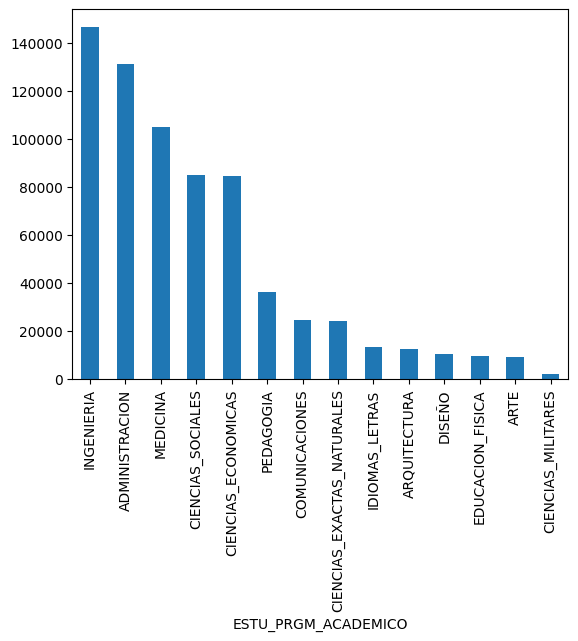

In [84]:
dataClean.ESTU_PRGM_ACADEMICO.value_counts().plot(kind='bar')

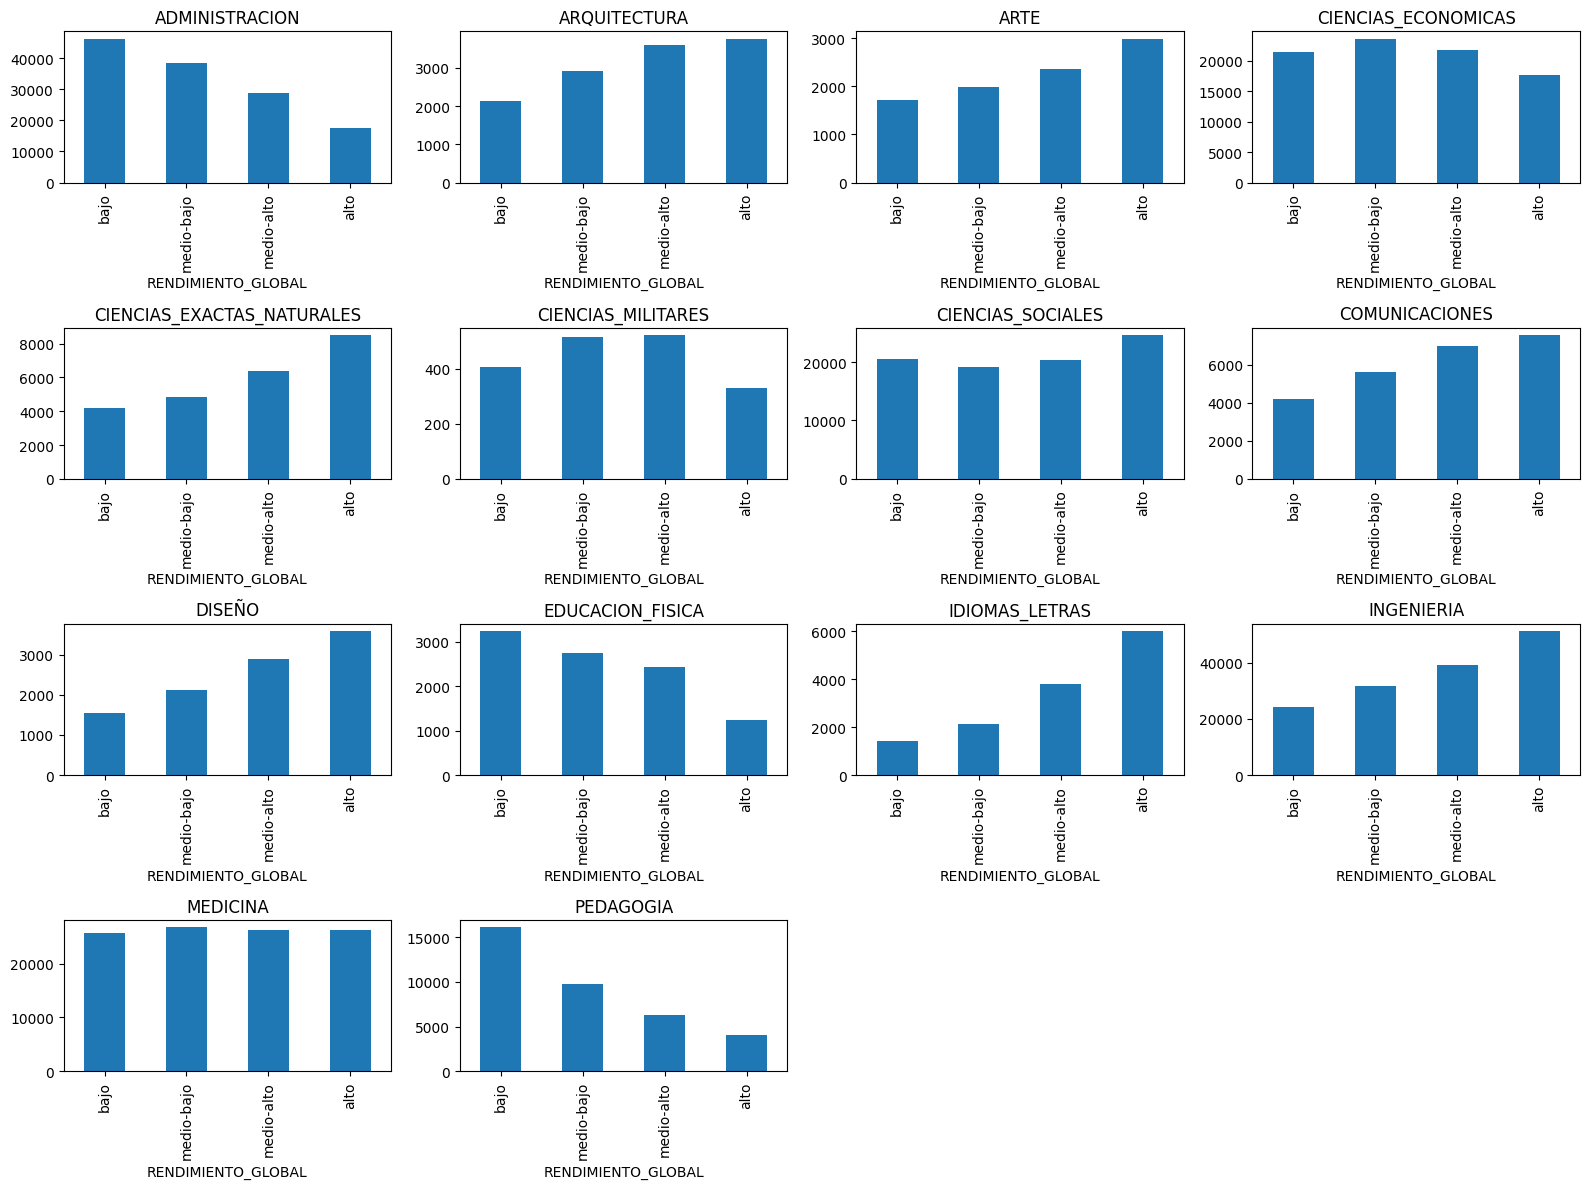

In [85]:
from rlxutils import subplots
import matplotlib.pyplot as plt

column = dataClean.ESTU_PRGM_ACADEMICO

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = dataClean[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

#Agrupación datos Departamento

Similar a el programa academico, queremos disminuir la cantidad de valores únicos para la columna de departamentos. Los agruparemos en regiones.

In [87]:
conteo_departamentos = dataClean['ESTU_PRGM_DEPARTAMENTO'].value_counts()
print(conteo_departamentos)

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


In [88]:
grupo_dict = {
    'CARIBE': ['ATLANTICO', 'BOLIVAR', 'CORDOBA', 'CESAR', 'LA GUAJIRA', 'MAGDALENA', 'SUCRE', 'SAN ANDRES'],
    'ANDINA': ['ANTIOQUIA', 'BOYACA', 'CUNDINAMARCA', 'RISARALDA', 'TOLIMA', 'CALDAS', 'CAUCA', 'HUILA', 'NORTE SANTANDER', 'QUINDIO', 'SANTANDER', 'BOGOTÁ'],
    'PACIFICA': ['CHOCO', 'NARIÑO', 'VALLE'],
    'ORINOQUIA': ['ARAUCA', 'CASANARE', 'META'],
    'AMAZONICA': ['AMAZONAS', 'CAQUETA', 'GUAVIARE', 'VAUPES', 'PUTUMAYO'],
}

def map_to_group(departamento):
    for group, departamentos in grupo_dict.items():
        if departamento in departamentos:
            return group
    return 'OTROS'

dataClean['ESTU_PRGM_DEPARTAMENTO'] = dataClean['ESTU_PRGM_DEPARTAMENTO'].apply(map_to_group)
dataClean.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,MEDICINA,ANDINA,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,CIENCIAS_SOCIALES,CARIBE,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,CIENCIAS_ECONOMICAS,ANDINA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION,ANDINA,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,MEDICINA,ANDINA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
5,659872,20203,MEDICINA,ANDINA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Secundaria (Bachillerato) completa,No,medio-alto
6,47159,20183,INGENIERIA,ANDINA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Técnica o tecnológica completa,Si,alto
7,11829,20183,ADMINISTRACION,ANDINA,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,medio-bajo
8,257869,20212,INGENIERIA,CARIBE,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Educación profesional incompleta,Si,medio-bajo
9,465511,20183,ADMINISTRACION,ANDINA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Postgrado,Si,alto


In [89]:
conteo_departamentos = dataClean['ESTU_PRGM_DEPARTAMENTO'].value_counts()
print(conteo_departamentos)

ESTU_PRGM_DEPARTAMENTO
ANDINA       511183
CARIBE       105090
PACIFICA      62331
ORINOQUIA     10351
AMAZONICA      3545
Name: count, dtype: int64


<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

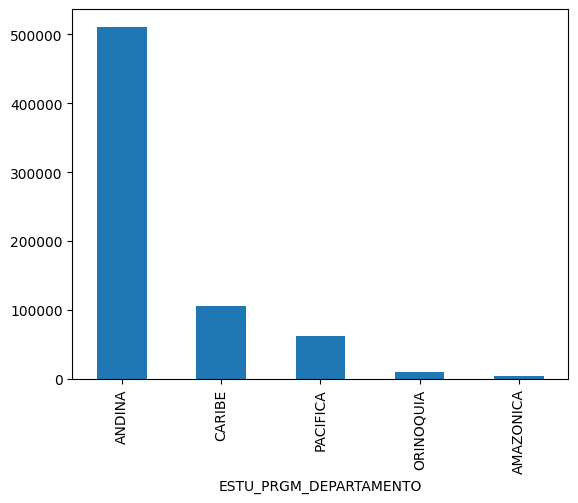

In [90]:
dataClean.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

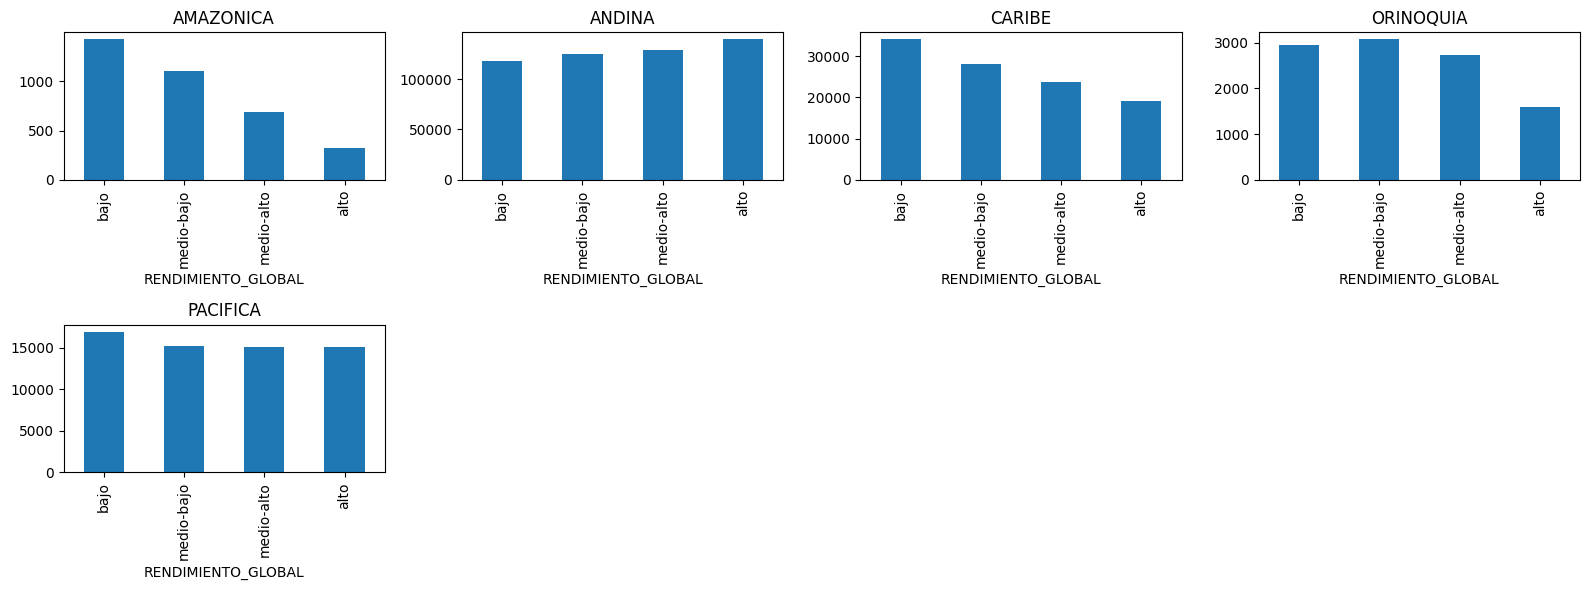

In [91]:
from rlxutils import subplots
import matplotlib.pyplot as plt

column = dataClean.ESTU_PRGM_DEPARTAMENTO

c = sorted(column.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = dataClean[column==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

#Analísis valores faltantes

In [92]:
print(dataClean.columns)

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')


In [93]:
faltantes = dataClean.isna().sum()
print(faltantes)

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64


Queremos saber si los natos nulos tienen una relación con el rendimiento de los estudiantes:

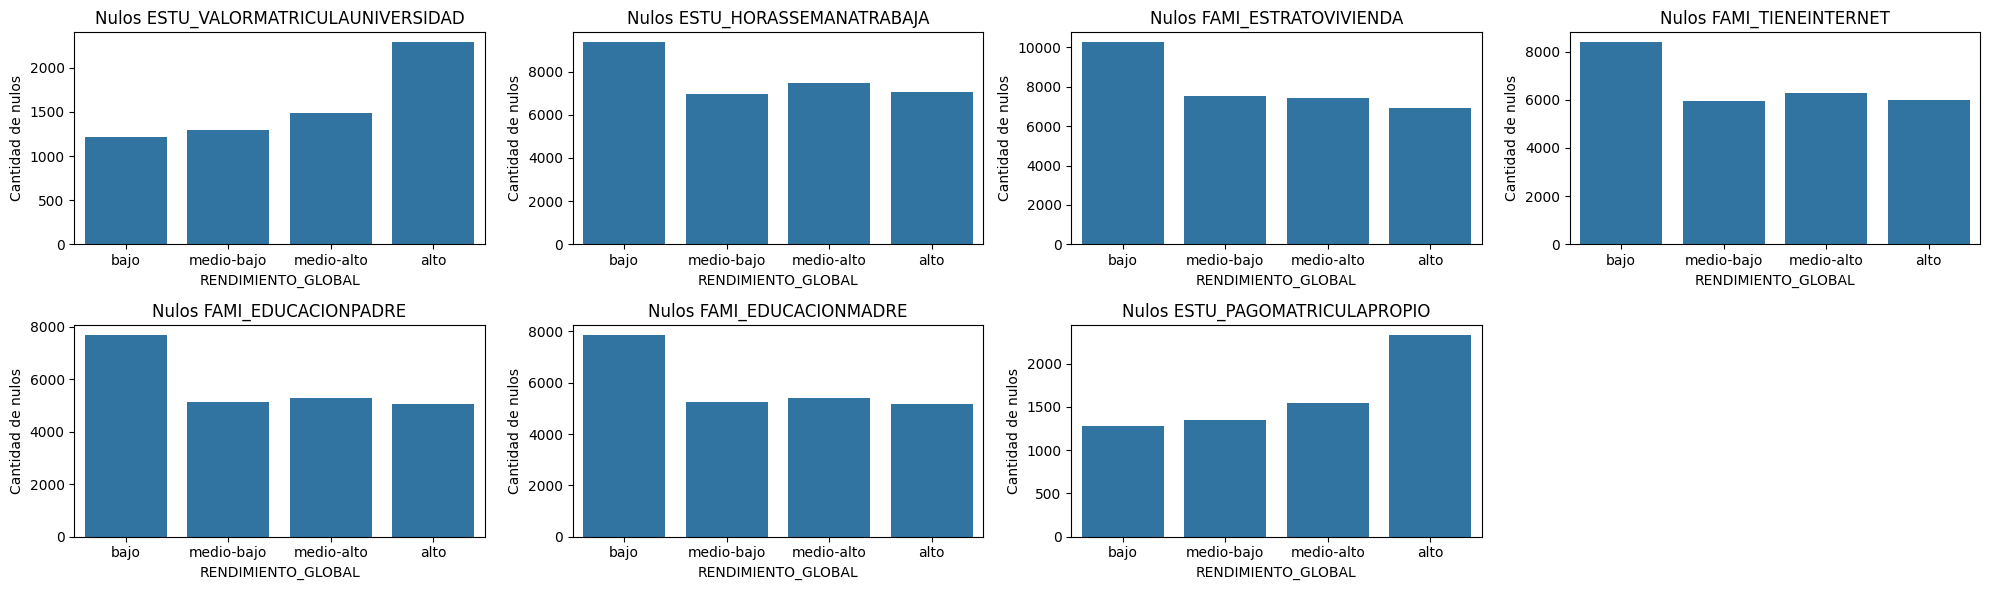

In [94]:
columnas = dataClean.columns.drop(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'RENDIMIENTO_GLOBAL'])
n_cols = 4
n_rows = (len(columnas) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 3))
orden_rendimiento = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Iteramos por cada columna y graficamos los nulos agrupados por 'RENDIMIENTO_GLOBAL'
for i, col in enumerate(columnas):
    nulos_por_grupo = dataClean[dataClean[col].isnull()].groupby('RENDIMIENTO_GLOBAL').size()
    row = i // n_cols
    col_index = i % n_cols
    sns.barplot(x=nulos_por_grupo.index, y=nulos_por_grupo.values, order=orden_rendimiento, ax=axes[row, col_index])

    axes[row, col_index].set_title(f'Nulos {col}')
    axes[row, col_index].set_xlabel('RENDIMIENTO_GLOBAL')
    axes[row, col_index].set_ylabel('Cantidad de nulos')

for i in range(len(columnas), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

En la gráfica anterior se evidencia que la columna para el valor de la matricula y la columna de pago matricula propio, parecen tener relación con el rendimiento global, por lo que tal vez se quiera mantener los datos nulos de estas dos columnas.

In [95]:
print(dataClean.dtypes)

ID                                 int64
PERIODO                            int64
ESTU_PRGM_ACADEMICO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
FAMI_EDUCACIONPADRE               object
FAMI_EDUCACIONMADRE               object
ESTU_PAGOMATRICULAPROPIO          object
RENDIMIENTO_GLOBAL                object
dtype: object


#Limpiando Rendimiento Global

In [96]:
mapeo = {'bajo': 0,
         'medio-bajo': 1,
         'medio-alto': 2,
         'alto': 3}

dataClean.RENDIMIENTO_GLOBAL = np.r_[[mapeo[i] for i in dataClean.RENDIMIENTO_GLOBAL]]
dataClean.RENDIMIENTO_GLOBAL.value_counts()

,count
RENDIMIENTO_GLOBAL,
3,175619
0,172987
1,172275
2,171619


#Limpiando Periodo

Como Periodo ya es númerico se decide dejar la columna tal cuál se encuentra.

In [97]:
dataClean.PERIODO.unique()

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

#Limpiando Programa Academico

In [99]:
conteo_programas = dataClean.ESTU_PRGM_ACADEMICO.value_counts()
print(conteo_programas)

ESTU_PRGM_ACADEMICO
INGENIERIA                    146581
ADMINISTRACION                130963
MEDICINA                      104885
CIENCIAS_SOCIALES              84667
CIENCIAS_ECONOMICAS            84463
PEDAGOGIA                      36258
COMUNICACIONES                 24406
CIENCIAS_EXACTAS_NATURALES     23906
IDIOMAS_LETRAS                 13337
ARQUITECTURA                   12399
DISEÑO                         10129
EDUCACION_FISICA                9652
ARTE                            9078
CIENCIAS_MILITARES              1776
Name: count, dtype: int64


In [100]:
valores = dataClean.ESTU_PRGM_ACADEMICO.values
ESTU_PRGM_ACADEMICO_vals = sorted(np.unique(valores))
ESTU_PRGM_ACADEMICO_onehot_vals = {val: np.eye(len(ESTU_PRGM_ACADEMICO_vals))[i] for i,val in enumerate(ESTU_PRGM_ACADEMICO_vals)}
ESTU_PRGM_ACADEMICO_onehot_vals

{'ADMINISTRACION': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ARQUITECTURA': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ARTE': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'CIENCIAS_ECONOMICAS': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'CIENCIAS_EXACTAS_NATURALES': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'CIENCIAS_MILITARES': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'CIENCIAS_SOCIALES': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'COMUNICACIONES': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'DISEÑO': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'EDUCACION_FISICA': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'IDIOMAS_LETRAS': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'INGENIERIA': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 

In [101]:
ESTU_PRGM_ACADEMICO_onehot_enc = np.r_[[ESTU_PRGM_ACADEMICO_onehot_vals[i] for i in dataClean.ESTU_PRGM_ACADEMICO]]
ESTU_PRGM_ACADEMICO_onehot_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [102]:
ESTU_PRGM_ACADEMICO_df = pd.DataFrame(ESTU_PRGM_ACADEMICO_onehot_enc, columns=[f"ESTU_PRGM_ACADEMICO__{v}" for v in ESTU_PRGM_ACADEMICO_onehot_vals])
ESTU_PRGM_ACADEMICO_df.head(10)

,ESTU_PRGM_ACADEMICO__ADMINISTRACION,ESTU_PRGM_ACADEMICO__ARQUITECTURA,ESTU_PRGM_ACADEMICO__ARTE,ESTU_PRGM_ACADEMICO__CIENCIAS_ECONOMICAS,ESTU_PRGM_ACADEMICO__CIENCIAS_EXACTAS_NATURALES,ESTU_PRGM_ACADEMICO__CIENCIAS_MILITARES,ESTU_PRGM_ACADEMICO__CIENCIAS_SOCIALES,ESTU_PRGM_ACADEMICO__COMUNICACIONES,ESTU_PRGM_ACADEMICO__DISEÑO,ESTU_PRGM_ACADEMICO__EDUCACION_FISICA,ESTU_PRGM_ACADEMICO__IDIOMAS_LETRAS,ESTU_PRGM_ACADEMICO__INGENIERIA,ESTU_PRGM_ACADEMICO__MEDICINA,ESTU_PRGM_ACADEMICO__PEDAGOGIA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
print(data.shape)

(692500, 12)


In [104]:
dataClean = pd.concat([ESTU_PRGM_ACADEMICO_df, dataClean], axis=1).drop('ESTU_PRGM_ACADEMICO', axis=1)
print(dataClean.shape)

(692500, 25)


In [105]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

dataClean.head(10)

,ESTU_PRGM_ACADEMICO__ADMINISTRACION,ESTU_PRGM_ACADEMICO__ARQUITECTURA,ESTU_PRGM_ACADEMICO__ARTE,ESTU_PRGM_ACADEMICO__CIENCIAS_ECONOMICAS,ESTU_PRGM_ACADEMICO__CIENCIAS_EXACTAS_NATURALES,ESTU_PRGM_ACADEMICO__CIENCIAS_MILITARES,ESTU_PRGM_ACADEMICO__CIENCIAS_SOCIALES,ESTU_PRGM_ACADEMICO__COMUNICACIONES,ESTU_PRGM_ACADEMICO__DISEÑO,ESTU_PRGM_ACADEMICO__EDUCACION_FISICA,ESTU_PRGM_ACADEMICO__IDIOMAS_LETRAS,ESTU_PRGM_ACADEMICO__INGENIERIA,ESTU_PRGM_ACADEMICO__MEDICINA,ESTU_PRGM_ACADEMICO__PEDAGOGIA,ID,PERIODO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,904256,20212,ANDINA,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,2
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645256,20212,CARIBE,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308367,20203,ANDINA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470353,20195,ANDINA,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,989032,20212,ANDINA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,659872,20203,ANDINA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Secundaria (Bachillerato) completa,No,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47159,20183,ANDINA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Técnica o tecnológica completa,Si,3
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11829,20183,ANDINA,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,257869,20212,CARIBE,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Educación profesional incompleta,Si,1
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,465511,20183,ANDINA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Postgrado,Si,3


#Limpiando Departamento

In [107]:
dataClean.ESTU_PRGM_DEPARTAMENTO.value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
ANDINA,511183
CARIBE,105090
PACIFICA,62331
ORINOQUIA,10351
AMAZONICA,3545


In [108]:
valores = dataClean.ESTU_PRGM_DEPARTAMENTO.values
ESTU_PRGM_DEPARTAMENTO_vals = sorted(np.unique(valores))
ESTU_PRGM_DEPARTAMENTO_onehot_vals = {val: np.eye(len(ESTU_PRGM_DEPARTAMENTO_vals))[i] for i,val in enumerate(ESTU_PRGM_DEPARTAMENTO_vals)}
ESTU_PRGM_DEPARTAMENTO_onehot_vals

{'AMAZONICA': array([1., 0., 0., 0., 0.]),
 'ANDINA': array([0., 1., 0., 0., 0.]),
 'CARIBE': array([0., 0., 1., 0., 0.]),
 'ORINOQUIA': array([0., 0., 0., 1., 0.]),
 'PACIFICA': array([0., 0., 0., 0., 1.])}

In [109]:
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in dataClean.ESTU_PRGM_DEPARTAMENTO]]
ESTU_PRGM_DEPARTAMENTO_onehot_enc

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [110]:
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])
ESTU_PRGM_DEPARTAMENTO_df.head(10)

,ESTU_PRGM_DEPARTAMENTO__AMAZONICA,ESTU_PRGM_DEPARTAMENTO__ANDINA,ESTU_PRGM_DEPARTAMENTO__CARIBE,ESTU_PRGM_DEPARTAMENTO__ORINOQUIA,ESTU_PRGM_DEPARTAMENTO__PACIFICA
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


In [111]:
dataClean = pd.concat([ESTU_PRGM_DEPARTAMENTO_df, dataClean], axis=1).drop('ESTU_PRGM_DEPARTAMENTO', axis=1)
print(dataClean.shape)

(692500, 29)


In [112]:
dataClean.head(10)

,ESTU_PRGM_DEPARTAMENTO__AMAZONICA,ESTU_PRGM_DEPARTAMENTO__ANDINA,ESTU_PRGM_DEPARTAMENTO__CARIBE,ESTU_PRGM_DEPARTAMENTO__ORINOQUIA,ESTU_PRGM_DEPARTAMENTO__PACIFICA,ESTU_PRGM_ACADEMICO__ADMINISTRACION,ESTU_PRGM_ACADEMICO__ARQUITECTURA,ESTU_PRGM_ACADEMICO__ARTE,ESTU_PRGM_ACADEMICO__CIENCIAS_ECONOMICAS,ESTU_PRGM_ACADEMICO__CIENCIAS_EXACTAS_NATURALES,ESTU_PRGM_ACADEMICO__CIENCIAS_MILITARES,ESTU_PRGM_ACADEMICO__CIENCIAS_SOCIALES,ESTU_PRGM_ACADEMICO__COMUNICACIONES,ESTU_PRGM_ACADEMICO__DISEÑO,ESTU_PRGM_ACADEMICO__EDUCACION_FISICA,ESTU_PRGM_ACADEMICO__IDIOMAS_LETRAS,ESTU_PRGM_ACADEMICO__INGENIERIA,ESTU_PRGM_ACADEMICO__MEDICINA,ESTU_PRGM_ACADEMICO__PEDAGOGIA,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,904256,20212,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,2
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645256,20212,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308367,20203,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470353,20195,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,3
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,989032,20212,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,1
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,659872,20203,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Secundaria (Bachillerato) completa,No,2
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47159,20183,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Técnica o tecnológica completa,Si,3
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11829,20183,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,1
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,257869,20212,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Educación profesional incompleta,Si,1
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,465511,20183,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Postgrado,Si,3


#Limpiando Valor Matricula

Para el valor de la matricula queremos mantener los valores nulos en una categoría ya que parecen tener influencia en el rendimiento global.

In [114]:
dataClean.ESTU_VALORMATRICULAUNIVERSIDAD.unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [115]:
dataClean.ESTU_VALORMATRICULAUNIVERSIDAD.values[dataClean.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'No info'
sum(dataClean.ESTU_VALORMATRICULAUNIVERSIDAD.isna())

0

In [116]:
mapeo = {'Más de 7 millones': 7.75,
        'Entre 5.5 millones y menos de 7 millones': 6.25,
        'Entre 4 millones y menos de 5.5 millones': 4.75,
        'Entre 2.5 millones y menos de 4 millones': 3.25,
        'Entre 1 millón y menos de 2.5 millones': 1.75,
        'Entre 500 mil y menos de 1 millón': .75,
        'Menos de 500 mil': .25,
        'No pagó matrícula': 0,
        'No info': -1}

dataClean.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[mapeo[i] for i in dataClean.ESTU_VALORMATRICULAUNIVERSIDAD]]
dataClean.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


#Limpiando Horas Semana Trabaja

Como se vio en la gráfica de influencias, solo parece tener relación si el estudiante trabaja o no trabaja, no cuantas horas trabaja. Por lo que se convertiran los datos a Sí(1) o No (0).

In [117]:
dataClean.ESTU_HORASSEMANATRABAJA.unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [118]:
dataClean.ESTU_HORASSEMANATRABAJA.values[dataClean.ESTU_HORASSEMANATRABAJA.isna()] = 'No info'
sum(dataClean.ESTU_HORASSEMANATRABAJA.isna())

0

In [119]:
mapeo = {'0': 0,
         'Menos de 10 horas': 1,
         'Entre 11 y 20 horas': 1,
         'Entre 21 y 30 horas': 1,
         'Más de 30 horas': 1,
         'No info': -1}

dataClean.ESTU_HORASSEMANATRABAJA = np.r_[[mapeo[i] for i in dataClean.ESTU_HORASSEMANATRABAJA]]
dataClean.ESTU_HORASSEMANATRABAJA.value_counts()

,count
ESTU_HORASSEMANATRABAJA,
1,545093
0,116550
-1,30857


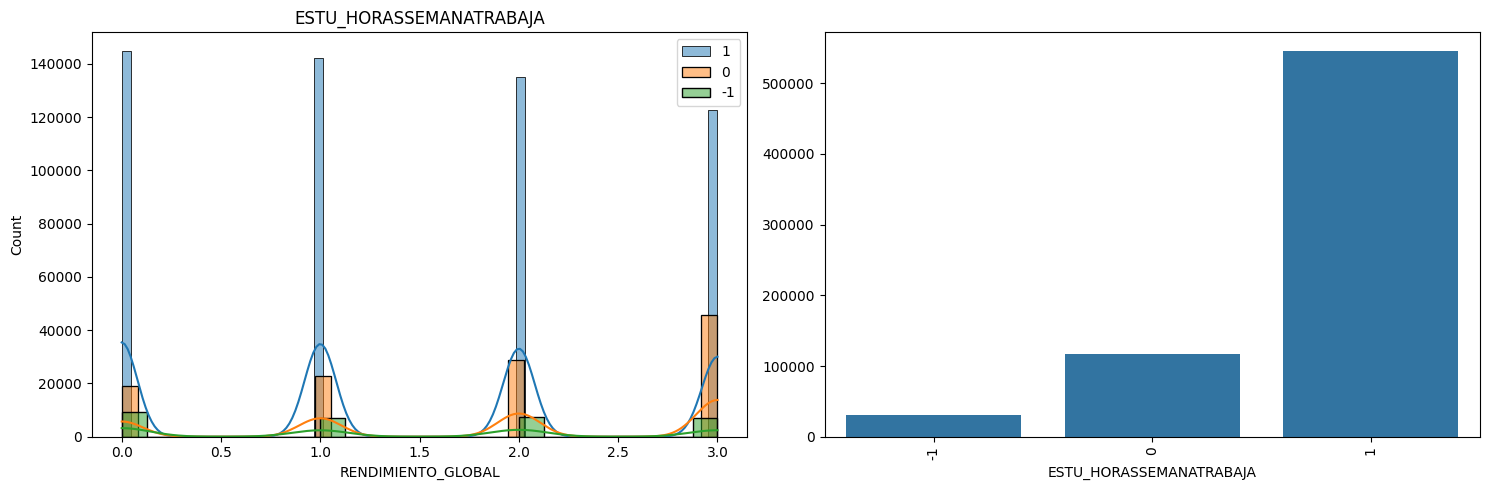

In [120]:
plt.figure(figsize=(15,5))
for i, c in enumerate(["ESTU_HORASSEMANATRABAJA"]):

    plt.subplot(1, 2, 1)
    k = dataClean[[c,"RENDIMIENTO_GLOBAL"]].dropna()
    for v in dataClean[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.legend()

    plt.subplot(1, 2, 2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

Después de ver el anterior gráfico se decidio que los valores faltantes no tienen peso sobre el rendimiento global, por lo que se remplazaran de manera aleatoria.

In [121]:
valores_horas_trabajo = dataClean[dataClean['ESTU_HORASSEMANATRABAJA'] != -1]['ESTU_HORASSEMANATRABAJA'].unique()
num_valores_faltantes = (dataClean['ESTU_HORASSEMANATRABAJA'] == -1).sum()
dataClean.loc[dataClean['ESTU_HORASSEMANATRABAJA'] == -1, 'ESTU_HORASSEMANATRABAJA'] = np.random.choice(valores_horas_trabajo, num_valores_faltantes)

In [122]:
faltantes = (dataClean['ESTU_HORASSEMANATRABAJA'] == -1).sum()
print(faltantes)

0


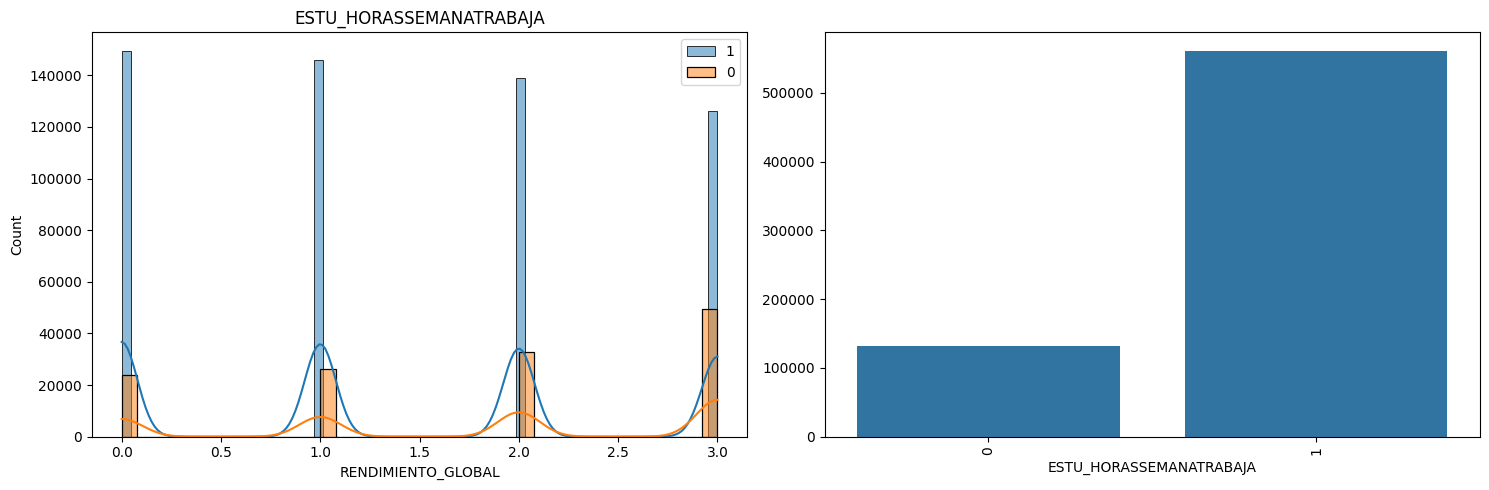

In [125]:
plt.figure(figsize=(15,5))
for i, c in enumerate(["ESTU_HORASSEMANATRABAJA"]):

    plt.subplot(1, 2, 1)
    k = dataClean[[c,"RENDIMIENTO_GLOBAL"]].dropna()
    for v in dataClean[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.legend()

    plt.subplot(1, 2, 2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

#Limpiando Estrato

In [126]:
dataClean.FAMI_ESTRATOVIVIENDA.unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [127]:
dataClean.FAMI_ESTRATOVIVIENDA.values[dataClean.FAMI_ESTRATOVIVIENDA.isna()] = 'No info'
sum(dataClean.FAMI_ESTRATOVIVIENDA.isna())

0

In [128]:
mapeo = {'Estrato 6': 6,
         'Estrato 5': 5,
         'Estrato 4': 4,
         'Estrato 3': 3,
         'Estrato 2': 2,
         'Estrato 1': 1,
         'Sin Estrato': 0,
         'No info': -1}

dataClean.FAMI_ESTRATOVIVIENDA = np.r_[[mapeo[i] for i in dataClean.FAMI_ESTRATOVIVIENDA]]
dataClean.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,32137
5,23608
6,12605
0,3289


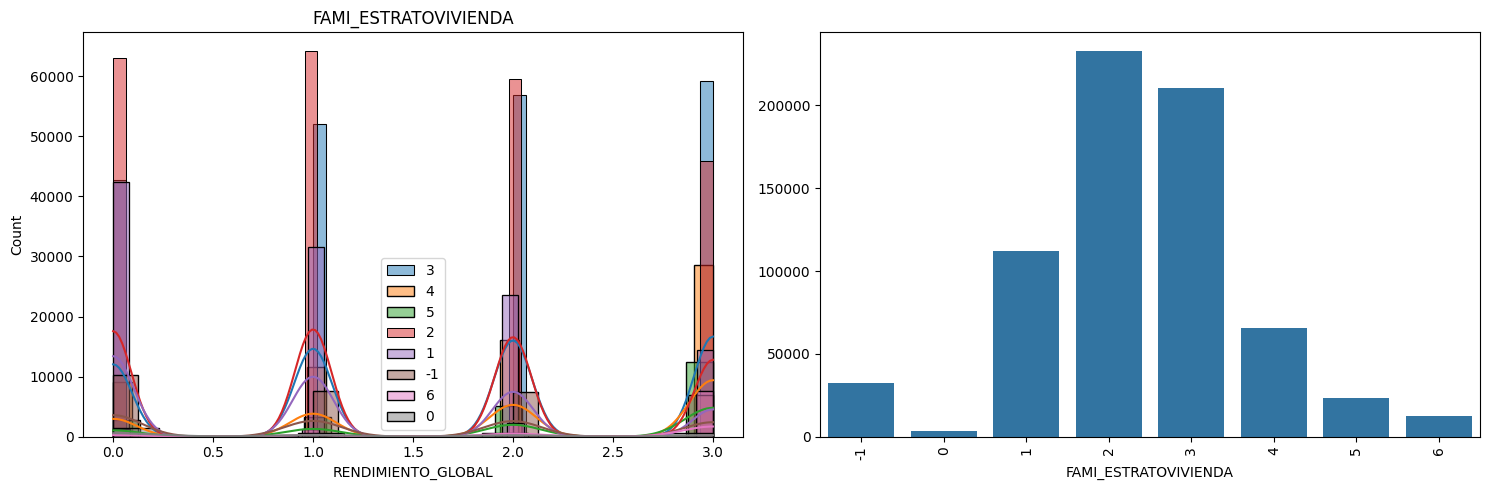

In [130]:
plt.figure(figsize=(15,5))
for i, c in enumerate(["FAMI_ESTRATOVIVIENDA"]):

    plt.subplot(1,2,1)
    k = dataClean[[c,"RENDIMIENTO_GLOBAL"]].dropna()
    for v in dataClean[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.legend()

    plt.subplot(1,2,2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

Consideramos que rellenar los datos de manera aleatoria es la opción que menos cambiaría la distribución actual de los datos.

In [131]:
valores_horas_trabajo = dataClean[dataClean['FAMI_ESTRATOVIVIENDA'] != -1]['FAMI_ESTRATOVIVIENDA'].unique()
num_valores_faltantes = (dataClean['FAMI_ESTRATOVIVIENDA'] == -1).sum()
dataClean.loc[dataClean['FAMI_ESTRATOVIVIENDA'] == -1, 'FAMI_ESTRATOVIVIENDA'] = np.random.choice(valores_horas_trabajo, num_valores_faltantes)

In [132]:
faltantes = (dataClean['FAMI_ESTRATOVIVIENDA'] == -1).sum()
print(faltantes)

0


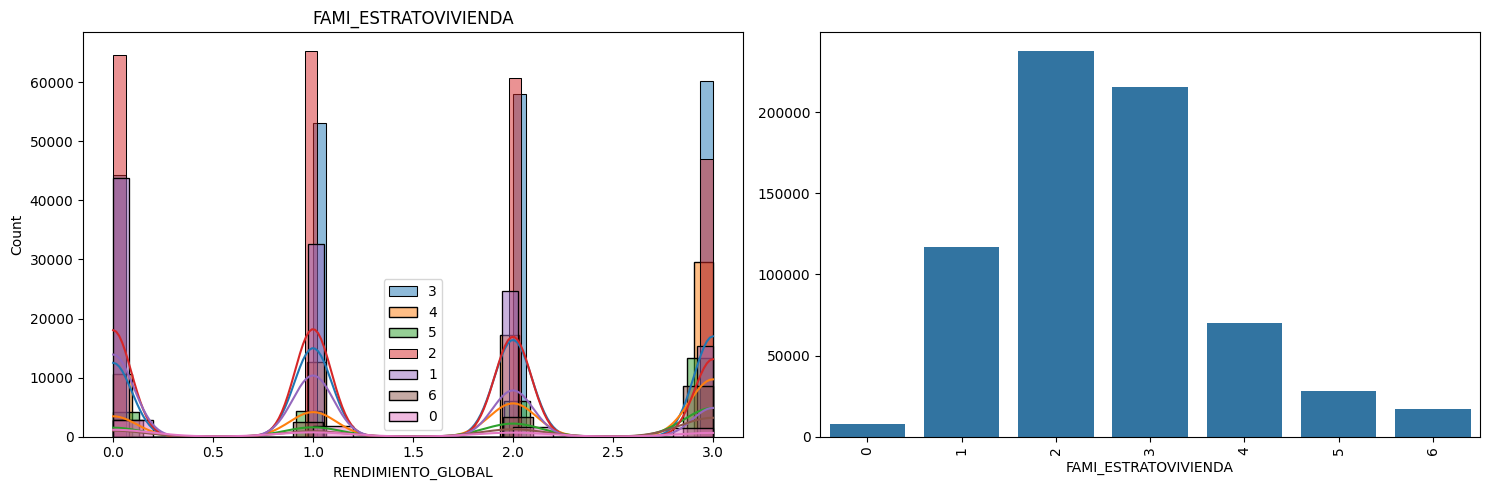

In [133]:
plt.figure(figsize=(15,5))
for i, c in enumerate(['FAMI_ESTRATOVIVIENDA']):

    plt.subplot(1,2,1)
    k = dataClean[[c,'RENDIMIENTO_GLOBAL']].dropna()
    for v in dataClean[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.legend()

    plt.subplot(1,2,2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

#Limpiando Tiene Internet

In [134]:
dataClean.FAMI_TIENEINTERNET.unique()

array(['Si', 'No', nan], dtype=object)

In [135]:
dataClean.FAMI_TIENEINTERNET.values[dataClean.FAMI_TIENEINTERNET.isna()] = 'No info'
sum(dataClean.FAMI_TIENEINTERNET.isna())

0

In [136]:
mapeo = {'Si': 1,
         'No': 0,
         'No info': -1}

dataClean.FAMI_TIENEINTERNET = np.r_[[mapeo[i] for i in dataClean.FAMI_TIENEINTERNET]]
dataClean.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
1,592514
0,73357
-1,26629


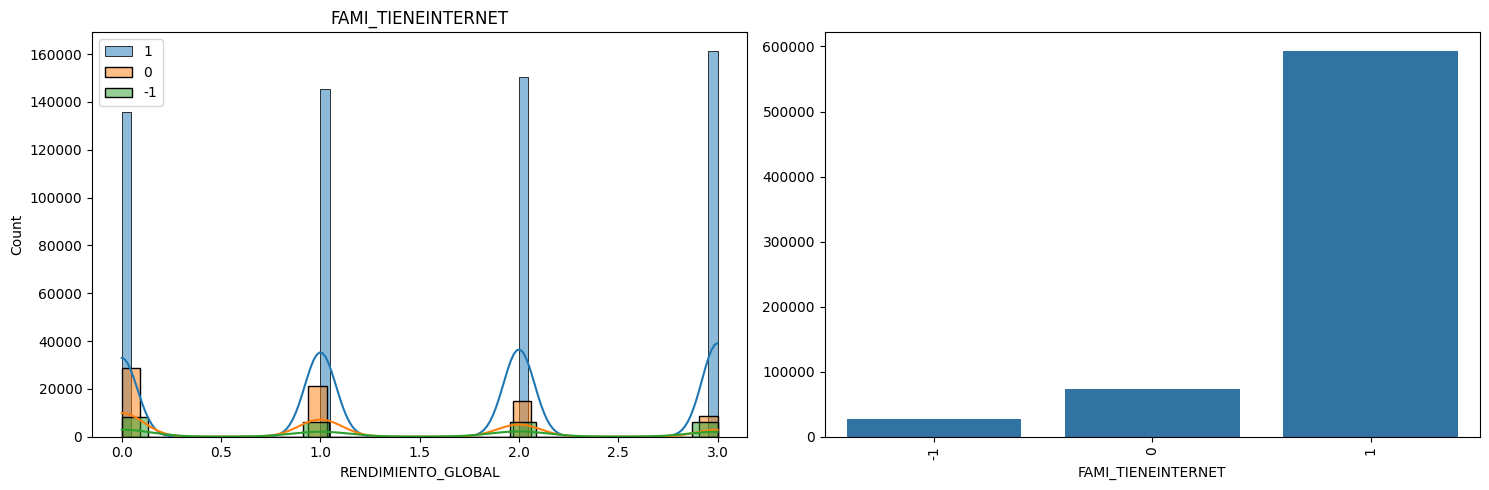

In [138]:
plt.figure(figsize=(15,5))
for i, c in enumerate(['FAMI_TIENEINTERNET']):

    plt.subplot(1,2,1)
    k = dataClean[[c,'RENDIMIENTO_GLOBAL']].dropna()
    for v in dataClean[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.legend()

    plt.subplot(1,2,2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

Consideramos que rellenar los datos de manera aleatoria es la opción que menos cambiaría la distribución actual de los datos.

In [139]:
valores_horas_trabajo = dataClean[dataClean['FAMI_TIENEINTERNET'] != -1]['FAMI_TIENEINTERNET'].unique()
num_valores_faltantes = (dataClean['FAMI_TIENEINTERNET'] == -1).sum()
dataClean.loc[dataClean['FAMI_TIENEINTERNET'] == -1, 'FAMI_TIENEINTERNET'] = np.random.choice(valores_horas_trabajo, num_valores_faltantes)

In [140]:
faltantes = (dataClean['FAMI_TIENEINTERNET'] == -1).sum()
print(faltantes)

0


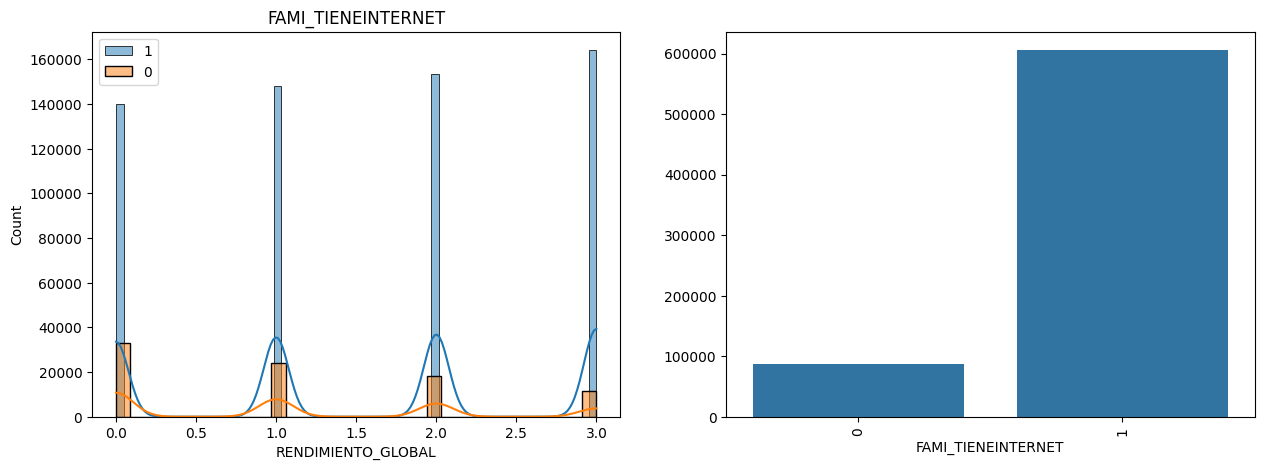

In [141]:
plt.figure(figsize=(15,5))
for i, c in enumerate(['FAMI_TIENEINTERNET']):

    plt.subplot(1,2,1)
    k = dataClean[[c,'RENDIMIENTO_GLOBAL']].dropna()
    for v in dataClean[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.legend()

    plt.subplot(1,2,2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

#Limpiando Estudios Padre

In [142]:
dataClean.FAMI_EDUCACIONPADRE.unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [143]:
print(sum(dataClean.FAMI_EDUCACIONPADRE.isna()))
dataClean.FAMI_EDUCACIONPADRE.value_counts()

23178


,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Técnica o tecnológica incompleta,22552


Como no hay tantos datos para "No sabe", "No aplica", y "nulos", además no parecen tener una gran influencia sobre el rendimiento global, se decidio juntarlos en un mismo valor.

Como los valores de la columna tienen un orden lógico, se decide reemplazar por valores númericos.

In [144]:
dataClean.FAMI_EDUCACIONPADRE.values[dataClean.FAMI_EDUCACIONPADRE.isna()] = 'No info'
sum(dataClean.FAMI_EDUCACIONPADRE.isna())

0

In [145]:
mapeo = {'Postgrado': 9,
         'Educación profesional completa': 8,
         'Educación profesional incompleta': 7,
         'Técnica o tecnológica completa': 6,
         'Técnica o tecnológica incompleta': 5,
         'Secundaria (Bachillerato) completa': 4,
         'Secundaria (Bachillerato) incompleta': 3,
         'Primaria completa': 2,
         'Primaria incompleta': 1,
         'Ninguno': 0,
         'No sabe': -1,
         'No Aplica': -1,
         'No info': -1}

dataClean.FAMI_EDUCACIONPADRE = np.r_[[mapeo[i] for i in dataClean.FAMI_EDUCACIONPADRE]]
dataClean.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
4,128289
1,125675
8,83117
3,71654
6,62995
2,55958
-1,48999
9,44169
7,27084


#Limpiando Estudios Madre

In [146]:
dataClean.FAMI_EDUCACIONMADRE.unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

In [147]:
print(sum(dataClean.FAMI_EDUCACIONMADRE.isna()))
dataClean.FAMI_EDUCACIONMADRE.value_counts()

23664


,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Técnica o tecnológica incompleta,27533
Educación profesional incompleta,22470


Como no hay tantos datos para "No sabe", "No aplica", y "nulos", además no parecen tener una gran influencia sobre el rendimiento global, se decidio juntarlos en un mismo valor.

Como los valores de la columna tienen un orden lógico, se decide reemplazar por valores númericos.

In [148]:
dataClean.FAMI_EDUCACIONMADRE.values[dataClean.FAMI_EDUCACIONMADRE.isna()] = 'No info'
sum(dataClean.FAMI_EDUCACIONMADRE.isna())

0

In [149]:
mapeo = {'Postgrado': 9,
         'Educación profesional completa': 8,
         'Educación profesional incompleta': 7,
         'Técnica o tecnológica completa': 6,
         'Técnica o tecnológica incompleta': 5,
         'Secundaria (Bachillerato) completa': 4,
         'Secundaria (Bachillerato) incompleta': 3,
         'Primaria completa': 2,
         'Primaria incompleta': 1,
         'Ninguno': 0,
         'No sabe': -1,
         'No Aplica': -1,
         'No info': -1}

dataClean.FAMI_EDUCACIONMADRE = np.r_[[mapeo[i] for i in dataClean.FAMI_EDUCACIONMADRE]]
dataClean.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
4,141744
1,99420
6,89542
8,85326
3,81012
2,56125
9,46246
-1,28599
5,27533


#Limpiando Pago Propio

En este caso se decidio mantener los valores nulos ya que parecen tener un minimo de influencia en el rendimiento global.

In [150]:
dataClean.ESTU_PAGOMATRICULAPROPIO.unique()

array(['No', 'Si', nan], dtype=object)

In [151]:
dataClean.ESTU_PAGOMATRICULAPROPIO.values[dataClean.ESTU_PAGOMATRICULAPROPIO.isna()] = 'No info'
sum(dataClean.ESTU_PAGOMATRICULAPROPIO.isna())

0

In [152]:
mapeo = {'Si': 1,
         'No': 0,
         'No info': -1}

dataClean.ESTU_PAGOMATRICULAPROPIO = np.r_[[mapeo[i] for i in dataClean.ESTU_PAGOMATRICULAPROPIO]]
dataClean.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
0,382201
1,303801
-1,6498


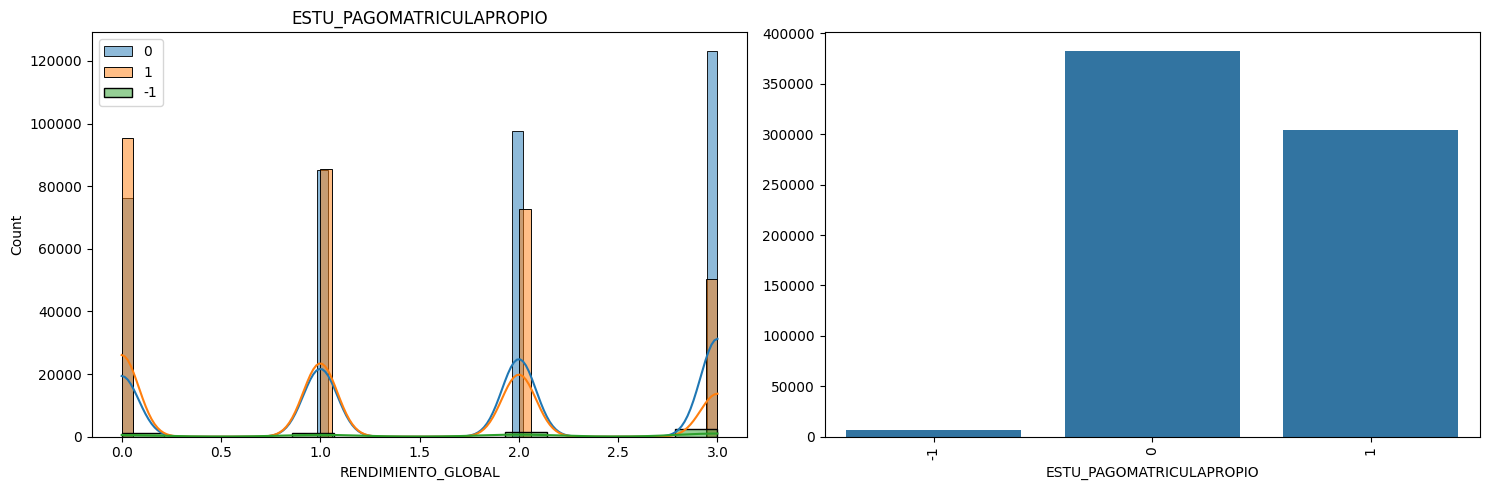

In [154]:
plt.figure(figsize=(15,5))
for i, c in enumerate(["ESTU_PAGOMATRICULAPROPIO"]):

    plt.subplot(1,2,1)
    k = dataClean[[c,"RENDIMIENTO_GLOBAL"]].dropna()
    for v in dataClean[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.legend()

    plt.subplot(1,2,2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

Al final se decidio que como eran pocos datos nulos y su distribución era similar a la de "No", se asigna "0" a los valore nulos.

In [155]:
mapeo = {1: 1,
         0: 0,
         -1: 0}

dataClean.ESTU_PAGOMATRICULAPROPIO = np.r_[[mapeo[i] for i in dataClean.ESTU_PAGOMATRICULAPROPIO]]
dataClean.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
0,388699
1,303801


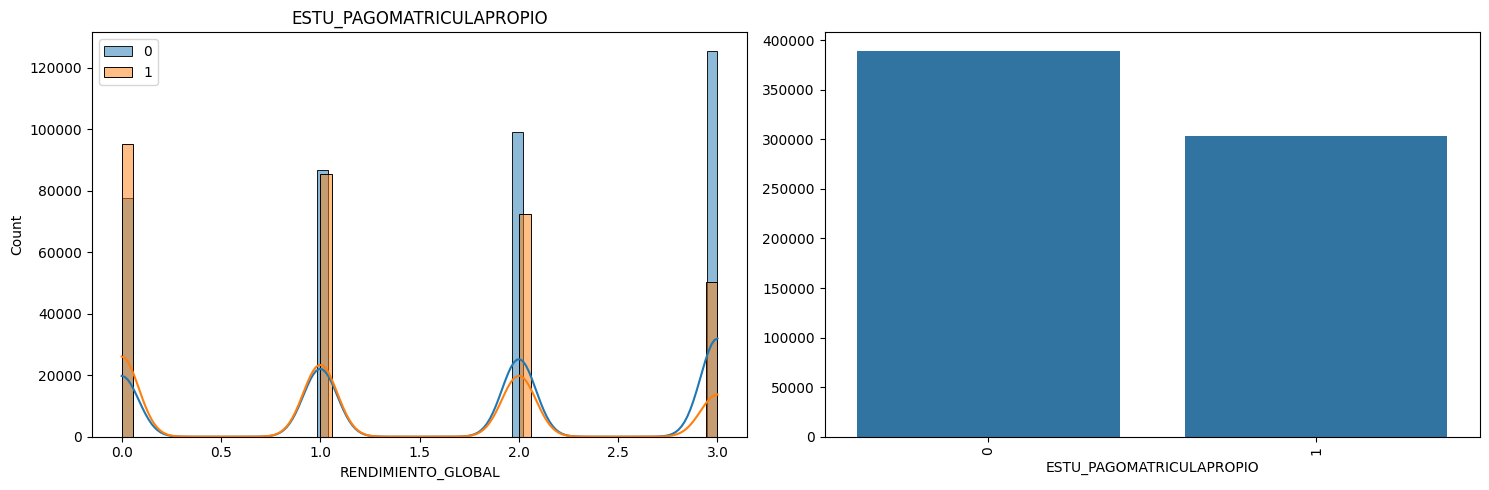

In [157]:
plt.figure(figsize=(15,5))
for i, c in enumerate(["ESTU_PAGOMATRICULAPROPIO"]):

    plt.subplot(1,2,1)
    k = dataClean[[c,"RENDIMIENTO_GLOBAL"]].dropna()
    for v in dataClean[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.legend()

    plt.subplot(1,2,2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

#Final Limpieza

Ahora todos nuestros datos son númericos

In [158]:
print(dataClean.dtypes)

ESTU_PRGM_DEPARTAMENTO__AMAZONICA                  float64
ESTU_PRGM_DEPARTAMENTO__ANDINA                     float64
ESTU_PRGM_DEPARTAMENTO__CARIBE                     float64
ESTU_PRGM_DEPARTAMENTO__ORINOQUIA                  float64
ESTU_PRGM_DEPARTAMENTO__PACIFICA                   float64
ESTU_PRGM_ACADEMICO__ADMINISTRACION                float64
ESTU_PRGM_ACADEMICO__ARQUITECTURA                  float64
ESTU_PRGM_ACADEMICO__ARTE                          float64
ESTU_PRGM_ACADEMICO__CIENCIAS_ECONOMICAS           float64
ESTU_PRGM_ACADEMICO__CIENCIAS_EXACTAS_NATURALES    float64
ESTU_PRGM_ACADEMICO__CIENCIAS_MILITARES            float64
ESTU_PRGM_ACADEMICO__CIENCIAS_SOCIALES             float64
ESTU_PRGM_ACADEMICO__COMUNICACIONES                float64
ESTU_PRGM_ACADEMICO__DISEÑO                        float64
ESTU_PRGM_ACADEMICO__EDUCACION_FISICA              float64
ESTU_PRGM_ACADEMICO__IDIOMAS_LETRAS                float64
ESTU_PRGM_ACADEMICO__INGENIERIA                    float